# **Proyecto de Predicción de Ventas: Rossmann Store Sales**

## **Descripción del Proyecto**
Este proyecto se enfoca en predecir las ventas diarias de las tiendas de la cadena Rossmann, utilizando datos históricos, características específicas de cada tienda y factores externos. La solución está orientada a optimizar la gestión de inventarios, la planificación de recursos y la toma de decisiones estratégicas.

## **Objetivos del Proyecto**
- Construir un modelo de aprendizaje automático que permita predecir las ventas futuras de manera precisa.
- Identificar las variables más influyentes en las ventas diarias.
- Generar un informe visual e interactivo que facilite la interpretación de los resultados y sirva como herramienta para la toma de decisiones.

## **Estructura del Proyecto**
1. **Carga y Exploración Inicial de Datos**: Inspección de los datos disponibles y detección de posibles inconsistencias.
2. **Análisis Exploratorio de Datos (EDA)**: Comprensión de patrones y relaciones entre las variables.
3. **Preprocesamiento de los Datos**: Manejo de valores nulos, codificación de variables categóricas y transformación de datos.
4. **Construcción de Modelos Predictivos**: Entrenamiento de modelos de aprendizaje automático.
5. **Evaluación del Modelo**: Medición de la precisión y optimización del modelo.
6. **Visualización de Resultados**: Creación de gráficos y dashboards interactivos.
7. **Conclusiones y Recomendaciones**: Síntesis de los hallazgos y recomendaciones estratégicas.

## **Archivos Utilizados**
- `train.csv`: Datos históricos de ventas utilizados para entrenar el modelo.
- `test.csv`: Datos para evaluar el modelo y realizar predicciones.
- `store.csv`: Información adicional sobre las características de las tiendas.
- `sample_submission.csv`: Plantilla para el formato de las predicciones finales.

## **Herramientas Utilizadas**
- **Lenguaje de Programación**: Python
- **Bibliotecas**: Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn, XGBoost
- **Entorno de Desarrollo**: Jupyter Notebook
- **Dataset**: Proporcionado por Kaggle

---

# Carga y Exploración Inicial de los Datos

Este paso consiste en cargar y realizar una inspección básica de los datasets que se utilizarán en el proyecto. Los archivos involucrados son:

1. `train.csv`: Contiene los datos históricos de ventas utilizados para entrenar el modelo.
2. `test.csv`: Incluye los datos para realizar predicciones.
3. `store.csv`: Contiene información sobre las características de las tiendas.
4. `sample_submission.csv`: Un archivo de ejemplo con el formato esperado para las predicciones.

---

## 1. Carga de Datos
- Los archivos son cargados en dataframes utilizando **pandas**.
- Esto asegura que los datos estén listos para ser procesados y analizados.

---

## 2. Información General de los Datasets
- Se imprime la estructura y resumen de cada dataset utilizando el método `.info()`.
- Esto permite identificar:
  - Número de filas y columnas.
  - Tipos de datos.
  - Valores nulos presentes en cada columna.

---

## 3. Exploración de las Primeras Filas
- Para entender mejor el contenido, se muestran las primeras filas de cada archivo con el método `.head()`.
- Esto ayuda a verificar la correcta carga de los datos y proporciona un vistazo inicial a su estructura.

---

## Resultados Esperados
Tras este análisis inicial, obtendremos:
- Un resumen claro de la estructura de los datasets.
- Una comprensión básica del contenido y formato de los datos.
- Identificación temprana de posibles problemas, como valores nulos o tipos de datos incorrectos, para abordar en etapas posteriores.

In [28]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Cargar los archivos CSV
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
store_data = pd.read_csv('store.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Mostrar información básica de los datos
print("Información del Dataset de Ventas (train):")
print(train_data.info())

print("\nInformación del Dataset de Prueba (test):")
print(test_data.info())

print("\nInformación del Dataset de Tiendas (store):")
print(store_data.info())

print("\nInformación del Archivo de Submisión (sample_submission):")
print(sample_submission.info())

# Opcional: Ver las primeras filas de cada archivo
print("\nPrimeras filas de train.csv:")
print(train_data.head())

print("\nPrimeras filas de test.csv:")
print(test_data.head())

print("\nPrimeras filas de store.csv:")
print(store_data.head())

print("\nPrimeras filas de sample_submission.csv:")
print(sample_submission.head())

Información del Dataset de Ventas (train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Información del Dataset de Prueba (test):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store 

/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3477392679.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


# Análisis Exploratorio de Datos (EDA)

Este paso se enfoca en explorar la estructura y relaciones dentro del conjunto de datos `train_data`. El objetivo es identificar patrones, distribuciones y correlaciones relevantes para el modelado posterior.

---

## 1. Distribución de Ventas
- Se inspecciona la distribución de la variable `Sales` utilizando un histograma combinado con una estimación de densidad (KDE).
- Esto permite entender la dispersión de las ventas y detectar posibles valores atípicos.

---

## 2. Mapa de Correlaciones
- Se calcula una matriz de correlaciones entre las variables numéricas del conjunto de datos.
- Un heatmap visualiza estas correlaciones, destacando relaciones fuertes (positivas o negativas) entre variables.
- Esto es útil para identificar qué variables podrían tener mayor impacto en las ventas.

---

## 3. Impacto de Variables Categóricas
- Se analiza el impacto de la variable categórica `Promo` sobre las ventas (`Sales`) utilizando un boxplot.
- Este análisis permite evaluar cómo las promociones (indicado por `Promo` = 1) afectan la distribución de ventas en comparación con períodos sin promociones (`Promo` = 0).

---

## 4. Análisis Temporal
- Se transforman las fechas (`Date`) en nuevas variables temporales: `Year`, `Month` y `Day`.
- Se visualizan las tendencias de ventas a lo largo del tiempo utilizando un gráfico de líneas.
- Esto permite identificar patrones estacionales o tendencias generales que pueden influir en las ventas.

---

## Resultados Esperados
Tras realizar este análisis:
- Se obtendrán insights sobre la distribución de ventas y su relación con otras variables.
- Las visualizaciones ayudarán a identificar patrones y correlaciones clave para el modelado predictivo.
- La transformación de las fechas proporcionará una base sólida para analizar factores temporales en el desempeño de ventas.

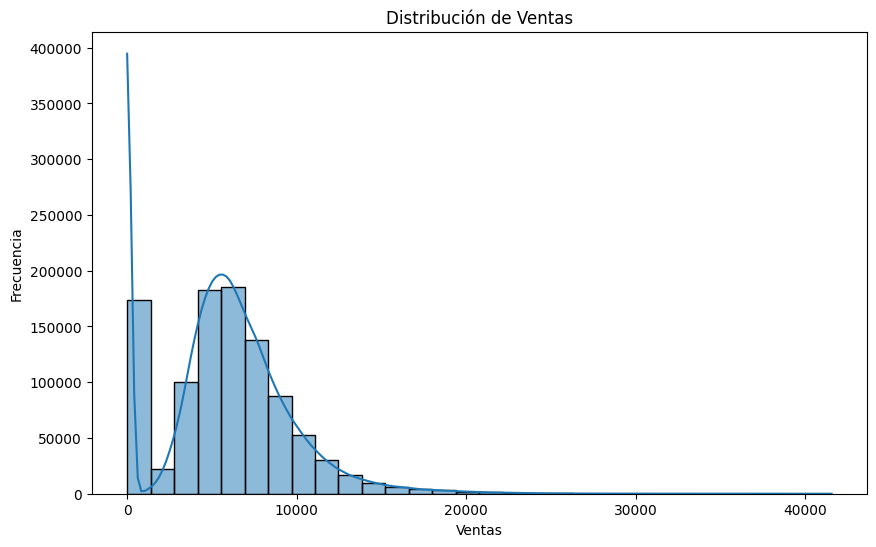

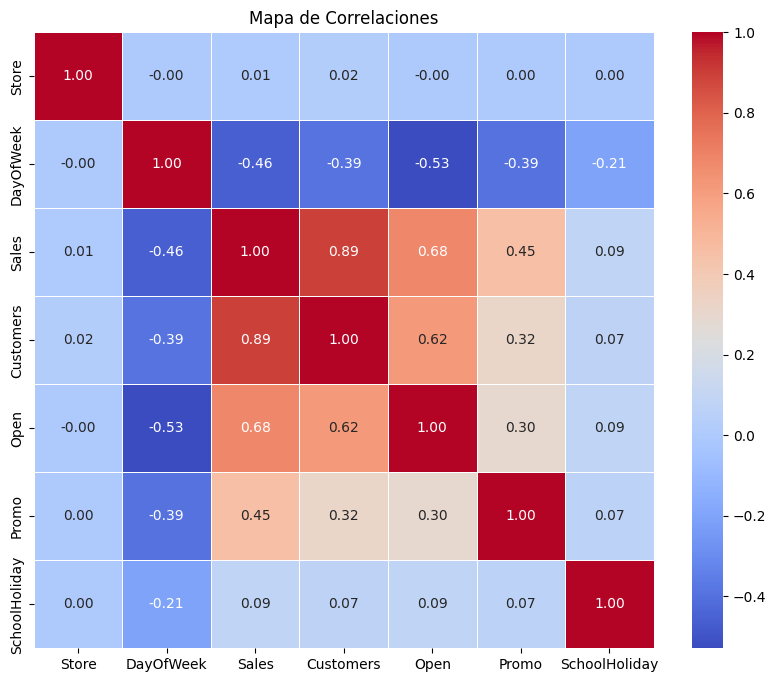

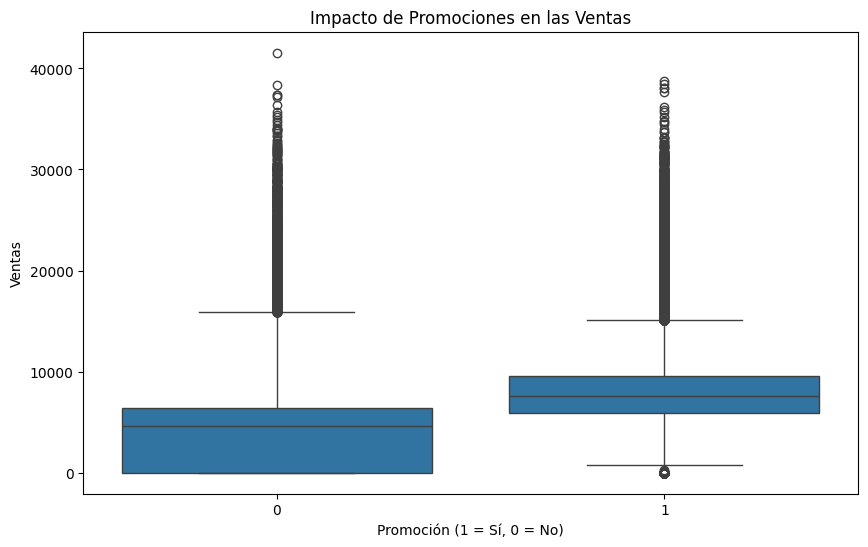

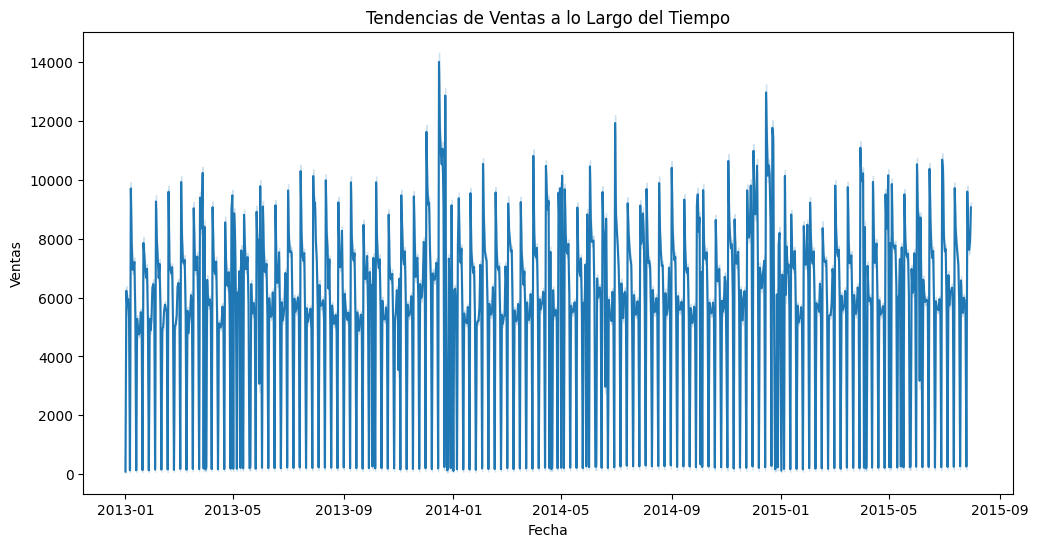

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Inspeccionar la distribución de las ventas
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Sales'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

# Relación entre variables numéricas (heatmap de correlaciones)
plt.figure(figsize=(10, 8))

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlaciones')
plt.show()

# Impacto de variables categóricas
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Impacto de Promociones en las Ventas')
plt.xlabel('Promoción (1 = Sí, 0 = No)')
plt.ylabel('Ventas')
plt.show()

# Tendencias temporales
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=train_data)
plt.title('Tendencias de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

## Preprocesamiento de los Datos

### **1. Manejo de Valores Nulos**

### **2. Codificación de Variables Categóricas**

### **3. Escalado de Variables Numéricas**

### **4. División del Dataset**

El preprocesamiento asegura que los datos estén limpios, codificados y normalizados para el análisis posterior.

# Manejo de Valores Nulos

En este paso, abordamos los valores nulos presentes en el conjunto de datos `train_data`. A continuación, se detalla el proceso seguido:

### **1. Verificación de Valores Nulos**
- Se identificaron las columnas con valores nulos y se calculó el porcentaje de valores nulos en relación al total de registros.

### **2. Estrategia de Imputación**
- **Variables Categóricas**:
  - Los valores nulos fueron imputados con la moda (valor más frecuente).
  - Si había múltiples valores de moda, se seleccionó el primero.
- **Variables Numéricas**:
  - Se compararon la media y la mediana de cada columna:
    - Si la diferencia entre ambas era significativa (más del 10% de la media), se usó la mediana.
    - En caso contrario, se utilizó la media.

### **3. Resultados**
- Todos los valores nulos fueron eliminados mediante la imputación adecuada.
- Se generó un registro detallado de las decisiones tomadas para cada columna, garantizando la trazabilidad del proceso.

### **4. Verificación Final**
- Se verificó que no quedaran valores nulos en el conjunto de datos.

In [30]:
# Verificar valores nulos
print("=== Verificación Inicial de Valores Nulos ===")
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])  # Mostrar solo las columnas con valores nulos

# Porcentaje de valores nulos por columna
print("\n=== Porcentaje de Valores Nulos por Columna ===")
missing_percentage = (missing_values / len(train_data)) * 100
print(missing_percentage[missing_percentage > 0])  # Mostrar solo las columnas con nulos

# Registro de decisiones tomadas
decision_log = []

# Imputación inteligente de valores nulos
print("\n=== Imputación de Valores Nulos ===")
for column in train_data.columns:
    if train_data[column].isnull().sum() > 0:  # Verificar si hay valores nulos
        print(f"\nProcesando columna: '{column}'")
        
        if train_data[column].dtype == 'object':  # Variables categóricas
            mode_value = train_data[column].mode()
            if len(mode_value) > 1:
                print(f"Columna '{column}' tiene múltiples modas: {mode_value.values}. Seleccionando la primera.")
            train_data[column].fillna(mode_value[0], inplace=True)
            print(f"Valores nulos imputados con la moda: '{mode_value[0]}'")
            decision_log.append(f"'{column}' (Categórica): Imputada con la moda '{mode_value[0]}'")
        
        else:  # Variables numéricas
            mean_value = train_data[column].mean()
            median_value = train_data[column].median()
            print(f"Media: {mean_value}, Mediana: {median_value}")
            if abs(mean_value - median_value) > 0.1 * mean_value:
                train_data[column].fillna(median_value, inplace=True)
                print(f"Valores nulos imputados con la mediana: {median_value}")
                decision_log.append(f"'{column}' (Numérica): Imputada con la mediana '{median_value}'")
            else:
                train_data[column].fillna(mean_value, inplace=True)
                print(f"Valores nulos imputados con la media: {mean_value}")
                decision_log.append(f"'{column}' (Numérica): Imputada con la media '{mean_value}'")

# Verificación final de valores nulos
print("\n=== Verificación Final de Valores Nulos ===")
final_missing_values = train_data.isnull().sum()
print(final_missing_values[final_missing_values > 0])  # Debería estar vacío si no hay nulos

# Mostrar registro de decisiones
print("\n=== Registro de Decisiones Tomadas ===")
for log in decision_log:
    print(log)

=== Verificación Inicial de Valores Nulos ===
Series([], dtype: int64)

=== Porcentaje de Valores Nulos por Columna ===
Series([], dtype: float64)

=== Imputación de Valores Nulos ===

=== Verificación Final de Valores Nulos ===
Series([], dtype: int64)

=== Registro de Decisiones Tomadas ===


# Transformación de Variables Categóricas

En este paso, se transforman las variables categóricas del conjunto de datos `train_data` para que sean compatibles con los modelos de aprendizaje automático.

## **1. Identificación de Variables Categóricas**
- Se identificaron las columnas categóricas (`dtype='object'`) en el conjunto de datos.

## **2. Verificación de Cardinalidad**
- **Baja Cardinalidad**: Columnas con ≤ 20 valores únicos.
- **Alta Cardinalidad**: Columnas con > 20 valores únicos.

## **3. Manejo de Variables Categóricas**
- **One-Hot Encoding**: Aplicado a columnas con baja cardinalidad.
- **Label Encoding**: Utilizado para columnas con alta cardinalidad, asegurando eficiencia en el almacenamiento y procesamiento.

## **4. Resultados**
- Las variables categóricas han sido convertidas a formatos numéricos compatibles.
- La transformación asegura la integridad y compatibilidad de los datos con los modelos.

## **Notas Adicionales**
- Los encoders para columnas de alta cardinalidad se han almacenado para futuras referencias.
- Se verificó la estructura final del conjunto de datos para confirmar el éxito de las transformaciones.

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Paso 1: Identificar columnas categóricas
categorical_cols = train_data.select_dtypes(include=['object']).columns
print("\n=== Columnas Categóricas Identificadas ===")
print(categorical_cols)

# Paso 2: Verificar la cardinalidad de las columnas categóricas
print("\n=== Cardinalidad de las Columnas Categóricas ===")
for col in categorical_cols:
    unique_values = train_data[col].nunique()
    print(f"Columna '{col}': {unique_values} valores únicos")

# Detectar columnas con alta y baja cardinalidad
high_cardinality_cols = [col for col in categorical_cols if train_data[col].nunique() > 20]
low_cardinality_cols = [col for col in categorical_cols if col not in high_cardinality_cols]

# Reporte de cardinalidad
if high_cardinality_cols:
    print("\n=== Columnas con Alta Cardinalidad Detectadas (más de 20 valores únicos) ===")
    print(high_cardinality_cols)
else:
    print("\nNo se detectaron columnas con alta cardinalidad.")

if low_cardinality_cols:
    print("\n=== Columnas con Baja Cardinalidad Detectadas ===")
    print(low_cardinality_cols)
else:
    print("\nNo se detectaron columnas con baja cardinalidad.")

# Paso 3: Aplicar One-Hot Encoding a columnas categóricas con baja cardinalidad
if low_cardinality_cols:
    print("\nAplicando One-Hot Encoding a columnas con baja cardinalidad...")
    train_data = pd.get_dummies(train_data, columns=low_cardinality_cols, drop_first=True)

# Paso 4: Aplicar Label Encoding a columnas categóricas con alta cardinalidad (si existen)
if high_cardinality_cols:
    print("\nAplicando Label Encoding a columnas con alta cardinalidad...")
    label_encoders = {}  # Almacenar los encoders para referencia futura
    for col in high_cardinality_cols:
        print(f"Codificando columna: '{col}'")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
        label_encoders[col] = le  # Guardar el encoder para referencia futura

# Paso 5: Verificar la transformación final
print("\n=== Estructura del Conjunto de Datos después de la Transformación ===")
print(train_data.info())
print("\nPrimeras filas del conjunto de datos transformado:")
print(train_data.head())


=== Columnas Categóricas Identificadas ===
Index(['StateHoliday'], dtype='object')

=== Cardinalidad de las Columnas Categóricas ===
Columna 'StateHoliday': 5 valores únicos

No se detectaron columnas con alta cardinalidad.

=== Columnas con Baja Cardinalidad Detectadas ===
['StateHoliday']

Aplicando One-Hot Encoding a columnas con baja cardinalidad...

=== Estructura del Conjunto de Datos después de la Transformación ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  int64         
 1   DayOfWeek       1017209 non-null  int64         
 2   Date            1017209 non-null  datetime64[ns]
 3   Sales           1017209 non-null  int64         
 4   Customers       1017209 non-null  int64         
 5   Open            1017209 non-null  int64         
 6   Promo           101720

# Escalado de Datos Numéricos

En este paso, las columnas numéricas del conjunto de datos `train_data` se transforman para normalizar su rango o estandarizar su distribución.

## **1. Identificación de Columnas Numéricas**
- Se identifican las columnas con tipos de datos numéricos (`float64` y `int64`).

## **2. Análisis de Distribución**
- Se calculan estadísticas descriptivas para entender el rango y la presencia de valores extremos.

## **3. Selección del Método de Escalado**
- **MinMaxScaler**:
  - Escala los datos al rango [0, 1].
  - Adecuado para columnas sin valores extremos significativos.
- **StandardScaler**:
  - Estandariza los datos restando la media y dividiendo por la desviación estándar.
  - Ideal para columnas con valores extremos.

## **4. Aplicación del Escalado**
- Se aplica el método más adecuado a cada columna numérica.

## **5. Guardado de Scalers**
- Los scalers utilizados se guardan en archivos `.pkl` para garantizar que el mismo proceso de escalado pueda aplicarse a nuevos datos.

## **Resultados Esperados**
- Todas las columnas numéricas estarán escaladas.
- Los scalers estarán disponibles para su reutilización.

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import joblib

# Paso 1: Identificar columnas numéricas
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
print("\n=== Columnas Numéricas Identificadas para Escalado ===")
print(numeric_cols)

# Paso 2: Analizar la distribución de las columnas numéricas
print("\n=== Análisis de Distribución de Columnas Numéricas ===")
for col in numeric_cols:
    print(f"\nEstadísticas de la columna '{col}':")
    print(train_data[col].describe())

# Paso 3: Seleccionar el método de escalado basado en la distribución
scalers = {}  # Diccionario para guardar los scalers aplicados
for col in numeric_cols:
    # Detectar valores extremos usando el rango intercuartílico (IQR)
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar valores extremos
    outliers = ((train_data[col] < lower_bound) | (train_data[col] > upper_bound)).sum()
    print(f"\nValores extremos detectados en '{col}': {outliers}")

    # Seleccionar y aplicar el método de escalado
    if outliers > 0:
        print(f"Usando **StandardScaler** para '{col}' debido a la presencia de valores extremos.")
        scaler = StandardScaler()
    else:
        print(f"Usando **MinMaxScaler** para '{col}'.")
        scaler = MinMaxScaler()

    # Aplicar el escalado
    train_data[[col]] = scaler.fit_transform(train_data[[col]])
    scalers[col] = scaler  # Guardar el scaler para su uso futuro

# Paso 4: Verificar la transformación
print("\n=== Datos Después de Aplicar el Escalado ===")
print(train_data[numeric_cols].head())

# Paso 5: Guardar los scalers (opcional)
print("\n=== Guardando Scalers Utilizados ===")
for col, scaler in scalers.items():
    filename = f"{col}_scaler.pkl"
    joblib.dump(scaler, filename)
    print(f"Scaler para '{col}' guardado en: {filename}")

print("\nTodos los scalers han sido guardados exitosamente.")


=== Columnas Numéricas Identificadas para Escalado ===
Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday'],
      dtype='object')

=== Análisis de Distribución de Columnas Numéricas ===

Estadísticas de la columna 'Store':
count    1.017209e+06
mean     5.584297e+02
std      3.219087e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.580000e+02
75%      8.380000e+02
max      1.115000e+03
Name: Store, dtype: float64

Estadísticas de la columna 'DayOfWeek':
count    1.017209e+06
mean     3.998341e+00
std      1.997391e+00
min      1.000000e+00
25%      2.000000e+00
50%      4.000000e+00
75%      6.000000e+00
max      7.000000e+00
Name: DayOfWeek, dtype: float64

Estadísticas de la columna 'Sales':
count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

Estadísticas de la columna 'Customers':
c

# División del Dataset en Conjuntos de Entrenamiento y Prueba

## **Objetivo**
Dividir el dataset en características (`X`) y variable objetivo (`y`), y posteriormente separar los datos en:
- **Conjunto de Entrenamiento (80%)**: Usado para entrenar los modelos.
- **Conjunto de Prueba (20%)**: Usado para evaluar el desempeño del modelo en datos no vistos.

---

## **Pasos Realizados**

### 1. Separación de Características y Variable Objetivo
- `X`: Todas las columnas excepto `Sales`.
- `y`: Columna `Sales`.

### 2. Análisis de la Variable Objetivo
- Se verificó el número de valores únicos en `y`.
- Se analizó la distribución de `y` para detectar posibles problemas de desequilibrio.

### 3. División del Dataset
- Proporción: 80% para entrenamiento, 20% para prueba.
- Estratificación: Activada si `y` está significativamente desequilibrada.

### 4. Validación de los Conjuntos
- Tamaños de `X_train`, `X_test`, `y_train`, y `y_test`.
- Proporciones de datos verificadas.

### 5. Guardado de Conjuntos (Opcional)
- Los conjuntos se guardaron como archivos `.pkl` para garantizar reproducibilidad.

---

## **Resultados Esperados**
- **Conjunto de Entrenamiento**: Datos utilizados para entrenar el modelo.
- **Conjunto de Prueba**: Datos utilizados para evaluar el modelo.
- **Archivos Guardados**: 
  - `X_train.pkl`
  - `X_test.pkl`
  - `y_train.pkl`
  - `y_test.pkl`

In [33]:
from sklearn.model_selection import train_test_split
import joblib

# Paso 1: Definir la variable objetivo y verificar su existencia
target_column = 'Sales'  # Especificar la columna objetivo
if target_column not in train_data.columns:
    raise ValueError(f"La columna objetivo '{target_column}' no está presente en el dataset.")

print("\n=== Separando Características (X) y Variable Objetivo (y) ===")
X = train_data.drop(target_column, axis=1)  # Características
y = train_data[target_column]  # Variable objetivo

# Validar dimensiones de X e y
print(f"Dimensiones de X (características): {X.shape}")
print(f"Dimensiones de y (objetivo): {y.shape}")

# Paso 2: Análisis de la variable objetivo (detección de desequilibrio)
print("\n=== Análisis de la Distribución de la Variable Objetivo ===")
unique_values = y.nunique()
print(f"La variable objetivo '{target_column}' tiene {unique_values} valores únicos.")

if unique_values < 20:  # Considerar un posible problema de desequilibrio
    value_counts = y.value_counts(normalize=True)
    print("\nDistribución de la variable objetivo:")
    print(value_counts)
    print("\nSe recomienda usar estratificación si la variable objetivo está significativamente desequilibrada.")

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
print("\n=== Dividiendo el Dataset ===")
test_size = 0.2  # 20% de los datos para el conjunto de prueba
random_state = 42  # Para garantizar la reproducibilidad

# Estratificación solo si la variable objetivo es categórica y está desequilibrada
stratify_option = y if unique_values < 20 else None

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=test_size, 
    random_state=random_state, 
    stratify=stratify_option
)

# Paso 4: Validar tamaños de los conjuntos
print("\n=== Validando Tamaños de los Conjuntos ===")
print(f"Tamaño del conjunto de entrenamiento: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Paso 5: Verificar proporción de datos en los conjuntos
print("\n=== Verificando Proporción de Datos ===")
train_ratio = len(X_train) / (len(X_train) + len(X_test))
test_ratio = len(X_test) / (len(X_train) + len(X_test))
print(f"Proporción en conjunto de entrenamiento: {train_ratio:.2%}")
print(f"Proporción en conjunto de prueba: {test_ratio:.2%}")

# Paso 6: Guardar los conjuntos divididos (opcional)
print("\n=== Guardando Conjuntos Divididos ===")
joblib.dump(X_train, "X_train.pkl")
joblib.dump(X_test, "X_test.pkl")
joblib.dump(y_train, "y_train.pkl")
joblib.dump(y_test, "y_test.pkl")
print("Conjuntos guardados exitosamente.")


=== Separando Características (X) y Variable Objetivo (y) ===
Dimensiones de X (características): (1017209, 14)
Dimensiones de y (objetivo): (1017209,)

=== Análisis de la Distribución de la Variable Objetivo ===
La variable objetivo 'Sales' tiene 21734 valores únicos.

=== Dividiendo el Dataset ===

=== Validando Tamaños de los Conjuntos ===
Tamaño del conjunto de entrenamiento: X_train: (813767, 14), y_train: (813767,)
Tamaño del conjunto de prueba: X_test: (203442, 14), y_test: (203442,)

=== Verificando Proporción de Datos ===
Proporción en conjunto de entrenamiento: 80.00%
Proporción en conjunto de prueba: 20.00%

=== Guardando Conjuntos Divididos ===
Conjuntos guardados exitosamente.


# Pipeline Completo para Entrenamiento y Evaluación de Modelos

Este pipeline integra todas las etapas necesarias para procesar, validar, entrenar, evaluar y visualizar modelos de regresión. El flujo está diseñado para manejar de manera robusta posibles errores y optimizar el rendimiento.

---

## 1. Procesamiento y Validación de Datos
### Procesamiento de Datos (`preprocess_data`):
- **Columnas `datetime`**: Se convierten en marcas de tiempo numéricas.
- **Columnas categóricas**: Se transforman mediante **One-Hot Encoding**.

### Validación de Datos (`validate_data`):
- Asegura que las dimensiones de los datos sean consistentes.
- Verifica que los tipos de datos sean válidos para los modelos de `scikit-learn` y `XGBoost`.

---

## 2. Cálculo de Métricas de Evaluación
### Métricas Calculadas (`calculate_metrics`):
- **MAE (Mean Absolute Error)**: Error promedio absoluto.
- **RMSE (Root Mean Squared Error)**: Raíz del error cuadrático medio.
- **R²**: Coeficiente de determinación.
- **EVS (Explained Variance Score)**: Varianza explicada.
- **MAPE (Mean Absolute Percentage Error)**: Error porcentual absoluto promedio.

### Registro de Métricas (`log_metrics`):
- Las métricas se registran en un formato estructurado, incluyendo tiempos de entrenamiento y predicción.

---

## 3. Entrenamiento y Evaluación de Modelos
### Modelos Implementados:
- **Linear Regression**: Regresión lineal.
- **Decision Tree**: Árbol de decisión con profundidad máxima ajustada.
- **Random Forest**: Bosque aleatorio con múltiples estimadores y control de profundidad.
- **XGBoost**: Modelo de gradiente optimizado.

### Proceso (`train_and_evaluate`):
1. Entrena cada modelo en los datos procesados.
2. Calcula las métricas de evaluación para el conjunto de prueba.
3. Registra las métricas y los tiempos de ejecución.

---

## 4. Visualización de Resultados
### Gráficos Generados (`plot_metrics`):
- **Errores (MAE, RMSE, MAPE)**: Gráfico de barras comparativo.
- **R²**: Gráfico de barras para visualizar el rendimiento de cada modelo.

Los gráficos utilizan un estilo uniforme definido globalmente.

---

## 5. Guardado de Resultados
### Archivo CSV (`save_results`):
- Los resultados se guardan en un archivo con un nombre único basado en la fecha y hora.
- Esto asegura trazabilidad y facilita análisis posteriores.

---

## 6. Función Principal del Pipeline
### Flujo General (`prepare_and_run_pipeline`):
1. **Validación**: Comprueba la consistencia de los datos.
2. **Procesamiento**: Prepara los datos para los modelos.
3. **Entrenamiento y Evaluación**: Genera métricas y registros.
4. **Visualización**: Compara gráficamente el desempeño de los modelos.
5. **Guardado**: Almacena los resultados para referencia futura.

---

## Resultados Esperados
- Un conjunto de métricas detalladas para cada modelo, con énfasis en el mejor desempeño según el **R²**.
- Gráficos claros que ilustran las diferencias entre los modelos.
- Resultados almacenados en un archivo CSV para facilitar la reproducibilidad.

---

## Ejecución del Pipeline
Asegúrate de tener los datos (`X_train`, `y_train`, `X_test`, `y_test`) disponibles en el entorno antes de ejecutar el pipeline. Si deseas cambiar el prefijo de los resultados, ajusta el parámetro `prefix` al llamar a `prepare_and_run_pipeline`.

2025-01-06 00:17:39,511 - INFO - Validación de datos completada con éxito.
2025-01-06 00:17:39,511 - INFO - Preprocesando datos...
2025-01-06 00:17:40,664 - INFO - Entrenando modelo: Linear Regression
2025-01-06 00:17:40,766 - INFO - Linear Regression - MAE: 0.2561, RMSE: 0.3828, R²: 0.8532, EVS: 0.8532, MAPE: 241.11%, Train Time: 0.0918s, Prediction Time: 0.0058s
2025-01-06 00:17:40,766 - INFO - Entrenando modelo: Decision Tree
2025-01-06 00:17:42,024 - INFO - Decision Tree - MAE: 0.2223, RMSE: 0.3343, R²: 0.8880, EVS: 0.8880, MAPE: 248.49%, Train Time: 1.2430s, Prediction Time: 0.0127s
2025-01-06 00:17:42,025 - INFO - Entrenando modelo: Random Forest
2025-01-06 00:19:44,528 - INFO - Random Forest - MAE: 0.1903, RMSE: 0.2845, R²: 0.9189, EVS: 0.9189, MAPE: 217.34%, Train Time: 120.9199s, Prediction Time: 1.5799s
2025-01-06 00:19:44,528 - INFO - Entrenando modelo: XGBoost
2025-01-06 00:19:45,257 - INFO - XGBoost - MAE: 0.2008, RMSE: 0.2947, R²: 0.9130, EVS: 0.9130, MAPE: 217.86%, Train

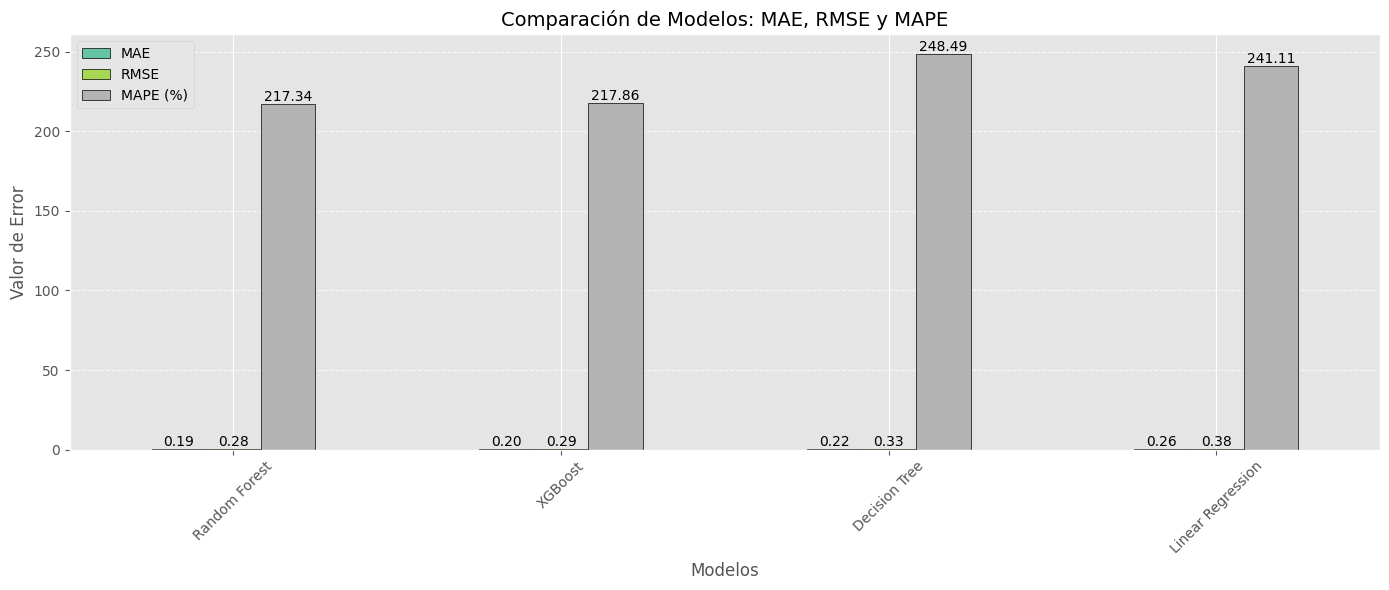

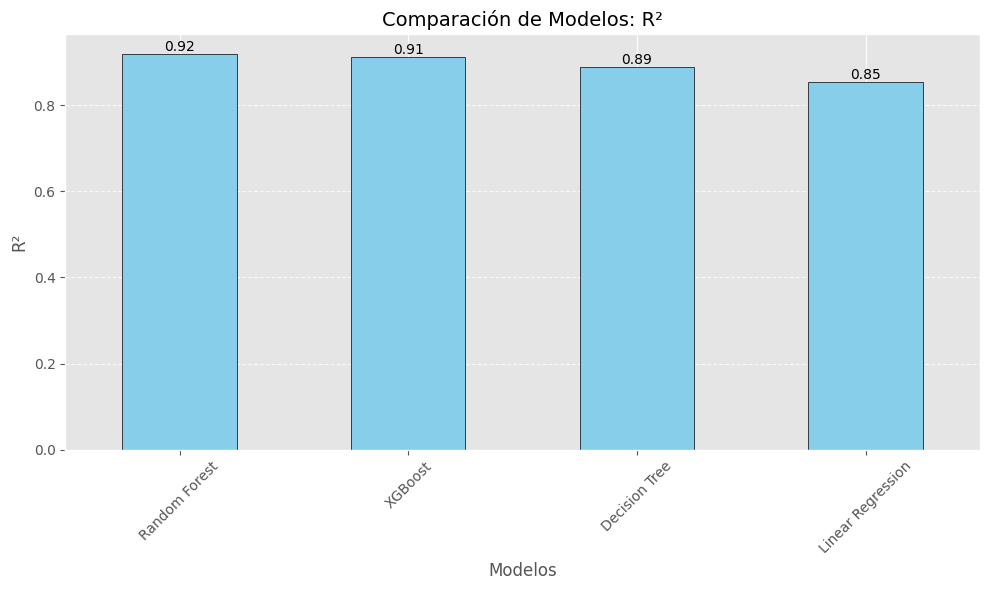

2025-01-06 00:19:45,449 - INFO - Resultados guardados en 'processed_dataset_evaluation_20250106_001945.csv'.


In [39]:
import numpy as np
import pandas as pd
from sklearn.base import RegressorMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score,
                             explained_variance_score)
import matplotlib.pyplot as plt
import logging
from datetime import datetime
import time

# Configuración inicial de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Configuraciones globales para gráficos y archivos
GRAPH_STYLE = "ggplot"
CSV_PREFIX = "model_evaluation"

# ============================================================================
# 1. Procesamiento y Validación de Datos
# ============================================================================

def preprocess_data(X):
    """
    Procesar columnas con tipos incompatibles para modelos de scikit-learn y XGBoost.
    Convierte columnas datetime y aplica encoding a categóricas.
    Args:
        X (pd.DataFrame): Dataset de características.
    Returns:
        pd.DataFrame: Dataset preprocesado.
    """
    X_processed = X.copy()
    
    # Procesar columnas datetime
    datetime_cols = X_processed.select_dtypes(include=["datetime64[ns]"]).columns
    for col in datetime_cols:
        X_processed[col] = X_processed[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)
    
    # Procesar columnas categóricas
    categorical_cols = X_processed.select_dtypes(include=["object", "category"]).columns
    if not categorical_cols.empty:
        logging.info(f"Aplicando encoding a columnas categóricas: {list(categorical_cols)}")
        X_processed = pd.get_dummies(X_processed, columns=categorical_cols, drop_first=True)
    
    return X_processed


def prepare_data(X_train, y_train, X_test, y_test):
    """
    Preprocesar los datos: manejo de datetime, categóricas y normalización.
    """
    logging.info("Preprocesando datos...")
    
    X_train_processed = preprocess_data(X_train)
    X_test_processed = preprocess_data(X_test)
    
    return X_train_processed, y_train, X_test_processed, y_test


def validate_data(X_train, y_train, X_test, y_test):
    """
    Validar que los datos de entrenamiento y prueba sean válidos y consistentes.
    """
    try:
        for data in [X_train, y_train, X_test, y_test]:
            if not isinstance(data, (np.ndarray, pd.DataFrame, pd.Series)):
                raise ValueError(f"Datos no válidos: esperado np.ndarray o pd.DataFrame, recibió {type(data)}")

        if len(X_train) != len(y_train):
            raise ValueError("X_train y y_train deben tener el mismo tamaño.")
        if len(X_test) != len(y_test):
            raise ValueError("X_test y y_test deben tener el mismo tamaño.")
        
        logging.info("Validación de datos completada con éxito.")
    except Exception as e:
        logging.error(f"Error en la validación de datos: {e}")
        raise


# ============================================================================
# 2. Cálculo de Métricas
# ============================================================================

def calculate_metrics(y_test, y_pred):
    """
    Calcular métricas de evaluación para el modelo.
    """
    if np.all(y_test == 0):
        logging.warning("Todos los valores en y_test son 0; MAPE podría no ser significativo.")
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)

    try:
        mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    except ZeroDivisionError:
        mape = np.inf

    return {
        "MAE": mae,
        "RMSE": rmse,
        "R²": r2,
        "EVS": evs,
        "MAPE (%)": mape
    }


def log_metrics(model_name, metrics, training_time, prediction_time):
    """
    Registrar métricas en el log con un formato unificado.
    """
    log_message = (
        f"{model_name} - "
        f"MAE: {metrics['MAE']:.4f}, "
        f"RMSE: {metrics['RMSE']:.4f}, "
        f"R²: {metrics['R²']:.4f}, "
        f"EVS: {metrics['EVS']:.4f}, "
        f"MAPE: {metrics['MAPE (%)']:.2f}%, "
        f"Train Time: {training_time:.4f}s, "
        f"Prediction Time: {prediction_time:.4f}s"
    )
    logging.info(log_message)


# ============================================================================
# 3. Entrenamiento y Evaluación
# ============================================================================

def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    """
    Entrenar y evaluar múltiples modelos.
    """
    results = []

    for model_name, model in models.items():
        if not isinstance(model, RegressorMixin):
            logging.warning(f"El modelo '{model_name}' no es un regressor de sklearn. Podrían ocurrir errores.")

        try:
            logging.info(f"Entrenando modelo: {model_name}")
            
            start_time = time.time()
            model.fit(X_train, y_train)
            training_time = round(time.time() - start_time, 4)

            start_time = time.time()
            y_pred = model.predict(X_test)
            prediction_time = round(time.time() - start_time, 4)

            metrics = calculate_metrics(y_test, y_pred)
            metrics.update({
                "Modelo": model_name,
                "Tiempo de Entrenamiento (s)": training_time,
                "Tiempo de Predicción (s)": prediction_time
            })
            results.append(metrics)
            
            log_metrics(model_name, metrics, training_time, prediction_time)

        except Exception as e:
            logging.error(f"Error entrenando el modelo {model_name}: {e}")

    return pd.DataFrame(results)


# ============================================================================
# 4. Visualización de Resultados
# ============================================================================

def configure_plot():
    """
    Configurar el estilo global de los gráficos.
    """
    plt.style.use(GRAPH_STYLE)


def plot_metrics(df):
    """
    Generar gráficos comparativos de métricas.
    """
    if df.empty:
        logging.warning("El DataFrame de resultados está vacío. No se pueden generar gráficos.")
        return

    configure_plot()

    try:
        plt.figure(figsize=(14, 6))
        ax = df.set_index("Modelo")[["MAE", "RMSE", "MAPE (%)"]].plot(
            kind="bar", rot=45, edgecolor="black", ax=plt.gca(), colormap="Set2"
        )
        for container in ax.containers:
            ax.bar_label(container, fmt="%.2f", label_type="edge")
        plt.title("Comparación de Modelos: MAE, RMSE y MAPE", fontsize=14)
        plt.ylabel("Valor de Error", fontsize=12)
        plt.xlabel("Modelos", fontsize=12)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        logging.error(f"Error generando gráfico de métricas de error: {e}")

    try:
        plt.figure(figsize=(10, 6))
        ax = df.set_index("Modelo")["R²"].plot(
            kind="bar", color="skyblue", rot=45, edgecolor="black", ax=plt.gca()
        )
        ax.bar_label(ax.containers[0], fmt="%.2f")
        plt.title("Comparación de Modelos: R²", fontsize=14)
        plt.ylabel("R²", fontsize=12)
        plt.xlabel("Modelos", fontsize=12)
        plt.grid(axis="y", linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        logging.error(f"Error generando gráfico de R²: {e}")


# ============================================================================
# 5. Guardar Resultados
# ============================================================================

def save_results(df, prefix="model_evaluation"):
    """
    Guardar los resultados en un archivo CSV.
    """
    filename = f"{prefix}_{datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
    df.to_csv(filename, index=False)
    logging.info(f"Resultados guardados en '{filename}'.")


# ============================================================================
# 6. Función Principal de Pipeline
# ============================================================================

def prepare_and_run_pipeline(models, X_train, y_train, X_test, y_test, prefix="model_evaluation"):
    """
    Ejecutar todo el flujo: validación, entrenamiento, visualización y guardado.
    """
    validate_data(X_train, y_train, X_test, y_test)
    X_train, y_train, X_test, y_test = prepare_data(X_train, y_train, X_test, y_test)

    results_df = train_and_evaluate(models, X_train, y_train, X_test, y_test)
    if results_df.empty:
        logging.error("No se generaron resultados. Se detiene el pipeline.")
        return

    results_df.sort_values(by="R²", ascending=False, inplace=True)
    plot_metrics(results_df)
    save_results(results_df, prefix=prefix)


# ============================================================================
# Ejecución del Pipeline
# ============================================================================

if __name__ == "__main__":
    # Verificar que los datos estén cargados
    # Asegúrate de que X_train, y_train, X_test y y_test existan en tu entorno

    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=10),
        "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=15),
        "XGBoost": XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
    }

    # Define un prefijo para los resultados
    prefix = "processed_dataset_evaluation"

    # Ejecutar el pipeline completo
    prepare_and_run_pipeline(
        models=models,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        prefix=prefix
    )

# Optimización de Hiperparámetros para XGBoost

En esta sección, se realiza una búsqueda de hiperparámetros utilizando `RandomizedSearchCV` para mejorar el desempeño del modelo **XGBoost**. Esto permite encontrar la combinación óptima de hiperparámetros de manera eficiente.

---

## 1. Hiperparámetros Evaluados
Los hiperparámetros seleccionados para optimizar incluyen:
- **`n_estimators`**: Número de árboles.
- **`max_depth`**: Profundidad máxima de los árboles.
- **`learning_rate`**: Tasa de aprendizaje.
- **`subsample`**: Fracción de muestras utilizadas para entrenar cada árbol.
- **`colsample_bytree`**: Fracción de columnas seleccionadas para cada árbol.
- **`gamma`**: Reducción mínima en la pérdida requerida para dividir un nodo.
- **`reg_alpha`**: Regularización L1 (coeficiente de penalización).
- **`reg_lambda`**: Regularización L2 (coeficiente de penalización).

---

## 2. Configuración de `RandomizedSearchCV`
- **Número de iteraciones (`n_iter`)**: 50 combinaciones de hiperparámetros.
- **Métrica de evaluación (`scoring`)**: Coeficiente de determinación (**R²**).
- **Validación cruzada (`cv`)**: 3 particiones para evaluar la estabilidad de los resultados.
- **Uso de múltiples núcleos (`n_jobs`)**: Acelera el proceso utilizando todos los núcleos disponibles.

---

## 3. Proceso de Optimización
1. Se inicializa el modelo **XGBoost**.
2. Se ejecuta la búsqueda de hiperparámetros con validación cruzada.
3. Se mide el tiempo total de optimización para referencia.

---

## 4. Resultados de la Optimización
- **Mejores hiperparámetros**: Se imprimen y guardan los mejores valores encontrados.
- **Mejor puntaje R²**: El mejor desempeño obtenido durante la validación cruzada.
- **Modelo optimizado**: Guardado como `best_xgboost_model.pkl` para uso futuro.

---

## 5. Resultados Intermedios
- Se almacenan los resultados de cada combinación de hiperparámetros probados en un archivo CSV llamado `xgboost_random_search_results.csv`.

---

## 6. Visualización de Resultados
Se genera un gráfico que muestra la distribución de los puntajes R² obtenidos durante la búsqueda:
- **Eje X**: Puntaje R².
- **Eje Y**: Frecuencia de combinaciones que obtuvieron un puntaje dado.

El gráfico se guarda como `xgboost_search_score_distribution.png` para referencia.

---

## Resultados Esperados
- Identificación de la mejor combinación de hiperparámetros para el modelo XGBoost.
- Almacenamiento del modelo optimizado y los resultados intermedios.
- Visualización clara de la distribución de los puntajes obtenidos durante la optimización.

2025-01-06 00:42:35,065 - INFO - Iniciando optimización de hiperparámetros para XGBoost...


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.3s


/Users/josephcode/Programacion/analisis_prediccion_ventas/prediccion_ventas_env/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=1.0, gamma=0.5, learning_rate=0.2, max_depth=3, n_estimators=100, reg_alpha=0.1, reg_lambda=2, subsample=0.8; total time=   2.5s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, max_depth=7, n_estimators=100, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   5.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1.5, subsample=1.0; total time=   8.4s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1.5, subsample=1.0; total time=   8.2s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.05, max_depth=5, n_estimators=300, reg_alpha=1, reg_lambda=1.5, subsample=1.0; total time=   8.3s
[CV] END colsample_bytree=0.8, gamma=0.5, learning_rate=0.2, max_dep

2025-01-06 00:46:39,146 - INFO - Optimización completada en 4.07 minutos.
2025-01-06 00:46:39,146 - INFO - Mejores Hiperparámetros: {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
2025-01-06 00:46:39,147 - INFO - Mejor R² obtenido: 0.9485
2025-01-06 00:46:39,159 - INFO - Modelo optimizado guardado exitosamente como 'best_xgboost_model.pkl'.
2025-01-06 00:46:39,166 - INFO - Resultados intermedios guardados en 'xgboost_random_search_results.csv'.


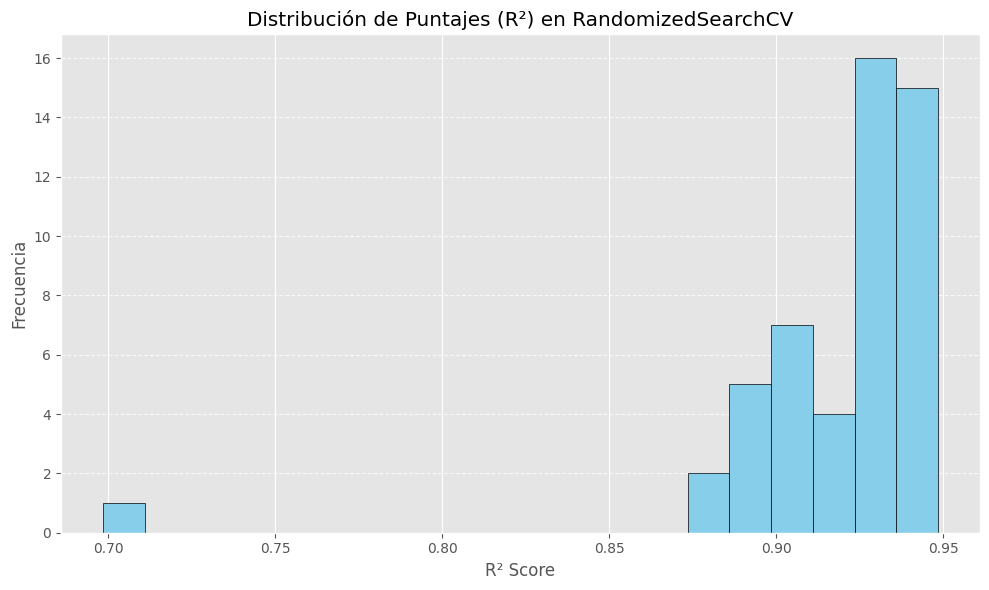

2025-01-06 00:46:39,309 - INFO - Gráfico de distribución de puntajes guardado como 'xgboost_search_score_distribution.png'.


In [44]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import logging
import joblib
import time
import matplotlib.pyplot as plt

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Wrapper para XGBRegressor compatible con scikit-learn
class SklearnXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, **kwargs):
        self.model = XGBRegressor(**kwargs)

    def fit(self, X, y, **kwargs):
        return self.model.fit(X, y, **kwargs)

    def predict(self, X):
        return self.model.predict(X)

    def set_params(self, **params):
        self.model.set_params(**params)
        return self

    def get_params(self, deep=True):
        return self.model.get_params(deep)

# Preprocesamiento de columnas de tipo datetime
def preprocess_dates(df):
    for col in df.select_dtypes(include=["datetime64[ns]"]).columns:
        df[f"{col}_year"] = df[col].dt.year
        df[f"{col}_month"] = df[col].dt.month
        df[f"{col}_day"] = df[col].dt.day
        df[f"{col}_weekday"] = df[col].dt.weekday
        df.drop(columns=[col], inplace=True)  # Elimina la columna original
    return df

# Preprocesar X_train y X_test
X_train = preprocess_dates(X_train)
X_test = preprocess_dates(X_test)

# Verificar y convertir columnas categóricas
for col in X_train.select_dtypes(include=["object"]).columns:
    X_train[col] = X_train[col].astype("category")
    X_test[col] = X_test[col].astype("category")

# Hiperparámetros para la búsqueda
param_distributions = {
    "n_estimators": [100, 300, 500, 700, 1000],
    "max_depth": [3, 5, 7, 10, 15],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.5],
    "reg_alpha": [0, 0.1, 0.5, 1],
    "reg_lambda": [0.5, 1, 1.5, 2]
}

# Instancia del modelo XGBoost
xgb_model = SklearnXGBRegressor(random_state=42, enable_categorical=True)

# Configuración de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring="r2",
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Medir el tiempo total de la optimización
start_time = time.time()
logging.info("Iniciando optimización de hiperparámetros para XGBoost...")

# Ejecutar la búsqueda
random_search.fit(X_train, y_train)

end_time = time.time()
total_time = end_time - start_time
logging.info(f"Optimización completada en {total_time / 60:.2f} minutos.")

# Resultados de la búsqueda
logging.info(f"Mejores Hiperparámetros: {random_search.best_params_}")
logging.info(f"Mejor R² obtenido: {random_search.best_score_:.4f}")

# Guardar el mejor modelo
best_model = random_search.best_estimator_
joblib.dump(best_model, "best_xgboost_model.pkl")
logging.info("Modelo optimizado guardado exitosamente como 'best_xgboost_model.pkl'.")

# Guardar resultados intermedios en un archivo CSV
results = pd.DataFrame(random_search.cv_results_)
results.to_csv("xgboost_random_search_results.csv", index=False)
logging.info("Resultados intermedios guardados en 'xgboost_random_search_results.csv'.")

# Visualización de resultados intermedios
plt.figure(figsize=(10, 6))
plt.hist(results["mean_test_score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de Puntajes (R²) en RandomizedSearchCV")
plt.xlabel("R² Score")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("xgboost_search_score_distribution.png")
plt.show()
logging.info("Gráfico de distribución de puntajes guardado como 'xgboost_search_score_distribution.png'.")

# Predicción y Evaluación del Modelo Optimizado

En esta sección, utilizamos el modelo XGBoost previamente optimizado para realizar predicciones en el conjunto de prueba (`X_test`) y evaluamos su desempeño utilizando métricas clave.

---

## 1. Predicción
- **Modelo utilizado**: El modelo XGBoost optimizado a través de `RandomizedSearchCV`.
- **Conjunto de datos**: `X_test` se utiliza para generar predicciones, y estas se comparan con los valores reales (`y_test`).

---

## 2. Métricas de Evaluación
Se calculan las siguientes métricas para evaluar el desempeño del modelo:
- **MAE (Mean Absolute Error)**:
  - Error promedio absoluto entre las predicciones y los valores reales.
  - Indica cuánto, en promedio, se desvían las predicciones de los valores reales.
- **RMSE (Root Mean Squared Error)**:
  - Raíz del error cuadrático medio, que penaliza errores grandes de manera más significativa.
- **R² (Coeficiente de Determinación)**:
  - Proporción de la varianza explicada por el modelo.
  - Un valor cercano a 1 indica un buen ajuste del modelo.

---

## 3. Resultados
- **MAE**: Muestra el error promedio absoluto en las unidades de la variable objetivo.
- **RMSE**: Proporciona una métrica de error similar al MAE pero más sensible a valores atípicos.
- **R²**: Indica qué tan bien el modelo explica la variabilidad de los datos.

Los valores calculados para estas métricas se imprimen directamente para revisión.

---

## Resultados Esperados
- Confirmar que el modelo optimizado genera predicciones precisas.
- Comparar las métricas obtenidas con las del modelo base para evaluar las mejoras logradas.

In [45]:
# Predicción con el modelo optimizado
y_pred = best_model.predict(X_test)

# Métricas de evaluación
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

MAE: 0.15
RMSE: 0.22
R²: 0.9498


# Importancia de las Características en el Modelo Optimizado

Esta sección analiza y visualiza la importancia de las características del modelo XGBoost optimizado. Este análisis ayuda a identificar qué variables tienen mayor impacto en las predicciones del modelo.

---

## 1. Importancia de las Características
- **Definición**: La importancia de una característica mide su contribución relativa al rendimiento del modelo.
- **Cálculo**: Se utiliza el atributo `feature_importances_` del modelo XGBoost, que indica el nivel de importancia de cada característica.

---

## 2. Creación de DataFrame
- Se crea un DataFrame que relaciona los nombres de las características (`Feature`) con su nivel de importancia (`Importance`).
- Las características se ordenan en orden descendente según su importancia.

---

## 3. Visualización de las Características Más Importantes
- Se genera un gráfico de barras horizontales que muestra las 10 características más importantes:
  - **Eje Y**: Nombre de las características.
  - **Eje X**: Nivel de importancia asignado por el modelo.
- Este gráfico facilita la interpretación visual de qué variables son más relevantes para el modelo.

---

## 4. Guardado de Resultados
- La tabla completa de importancia de características se guarda en un archivo CSV llamado `feature_importance.csv`.
- El gráfico de las 10 características principales se guarda como una imagen llamada `feature_importance_top_10.png`.

---

## Resultados Esperados
- **Análisis cuantitativo**: Identificar las variables más influyentes en las predicciones del modelo.
- **Visualización clara**: Un gráfico que resalte las características clave para una interpretación rápida.
- **Almacenamiento de resultados**: Guardar los datos para análisis posteriores o referencia futura.

2025-01-06 16:40:12,691 - INFO - Gráfico de importancia guardado como 'enhanced_feature_importance.png'.


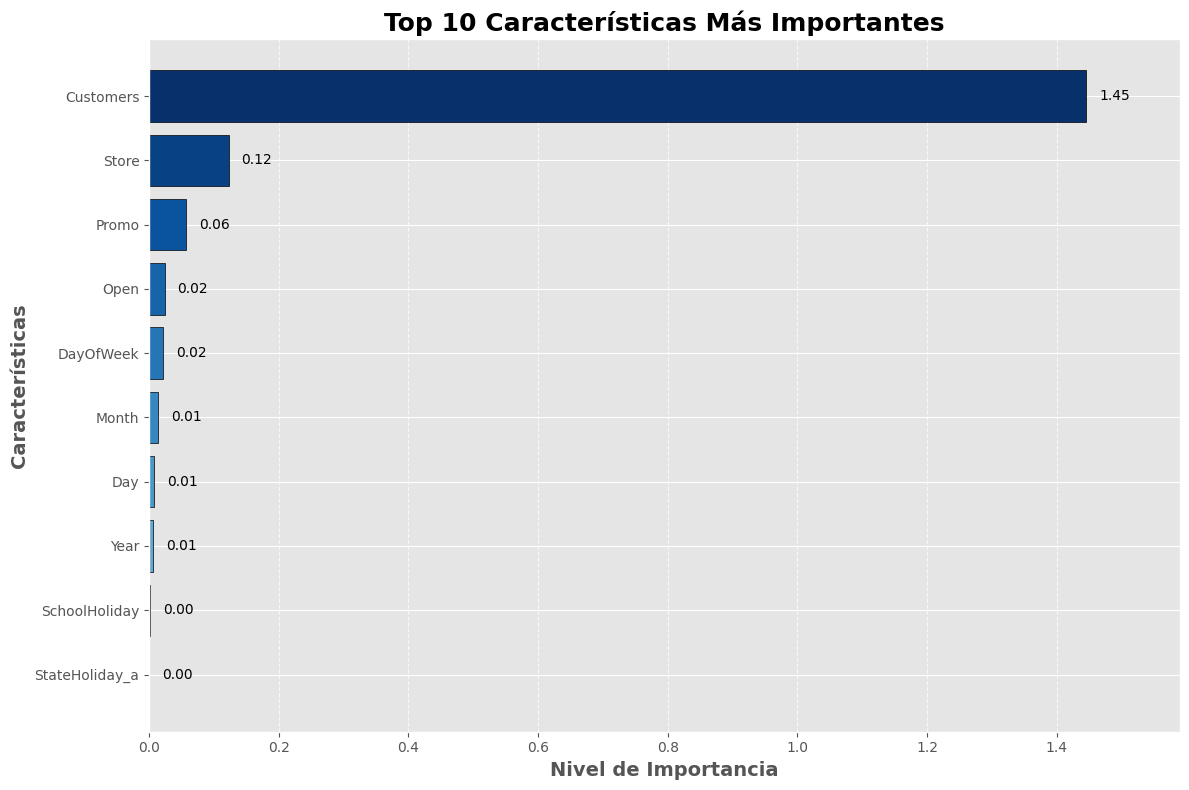

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import logging

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def plot_enhanced_feature_importance(importance_df, top_n=10, file_name=None):
    """
    Visualizar las características más importantes con mejoras en diseño.
    
    Args:
        importance_df (DataFrame): DataFrame con las características y su importancia.
        top_n (int): Número de características a mostrar. Por defecto 10.
        file_name (str): Nombre del archivo para guardar el gráfico. Si es None, no se guarda.
    """
    try:
        # Validar el DataFrame
        if importance_df.empty:
            raise ValueError("El DataFrame de importancia de características está vacío.")

        # Seleccionar las características principales
        top_features = importance_df.head(top_n)

        # Crear el gráfico
        plt.figure(figsize=(12, 8))
        colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_features)))
        bars = plt.barh(
            top_features["Feature"][::-1],  # Invertir para que las más importantes estén arriba
            top_features["Importance"][::-1],
            color=colors,
            edgecolor="black"
        )
        
        # Añadir etiquetas a las barras
        for bar in bars:
            plt.text(
                bar.get_width() + 0.02,  # Ajustar posición
                bar.get_y() + bar.get_height() / 2,
                f'{bar.get_width():.2f}',
                va='center', fontsize=10, color='black'
            )

        # Personalizar el gráfico
        plt.title(f"Top {top_n} Características Más Importantes", fontsize=18, weight='bold')
        plt.xlabel("Nivel de Importancia", fontsize=14, weight='bold')
        plt.ylabel("Características", fontsize=14, weight='bold')
        plt.xlim(0, top_features["Importance"].max() * 1.1)  # Ajustar el eje X
        plt.grid(axis="x", linestyle="--", alpha=0.7)
        plt.tight_layout()

        # Guardar el gráfico si se especifica un archivo
        if file_name:
            plt.savefig(file_name, dpi=300)
            logging.info(f"Gráfico de importancia guardado como '{file_name}'.")
        
        # Mostrar el gráfico
        plt.show()

    except Exception as e:
        logging.error(f"Error al generar el gráfico de importancia de características: {e}")
        raise

# Uso de la función mejorada
try:
    plot_enhanced_feature_importance(
        importance_df=importance_df,  # DataFrame con importancia calculada
        top_n=10,  # Mostrar las 10 más importantes
        file_name="enhanced_feature_importance.png"  # Guardar como imagen
    )
except Exception as e:
    logging.error(f"Error en el proceso de visualización de importancia de características: {e}")

# Distribución de las Características Más Importantes

En esta sección, se analiza la distribución de las 5 características más importantes identificadas por el modelo optimizado. Este análisis ayuda a entender la naturaleza de estas variables y su impacto potencial en las predicciones.

---

## 1. Selección de las Características
- Se seleccionan las 5 características con mayor importancia, basándose en el análisis previo de importancia de características.

---

## 2. Visualización de la Distribución
- **Gráficos de histograma**:
  - Muestran la distribución de valores para cada una de las 5 características principales.
  - Ayudan a identificar patrones, asimetrías y posibles valores atípicos.
- **Configuración**:
  - Se genera un histograma para cada característica, organizado en un diseño de 2 filas por 3 columnas.
  - Los gráficos se personalizan con bordes negros (`edgecolor`) y 30 bins para mayor detalle.

---

## 3. Guardado de la Visualización
- La figura resultante se guarda como una imagen llamada `top_features_distribution.png`, que incluye todos los histogramas generados.

---

## Resultados Esperados
- **Interpretación visual**: Comprender cómo se distribuyen las 5 características más influyentes en el conjunto de entrenamiento.
- **Identificación de patrones**: Detectar posibles valores atípicos o características con distribuciones sesgadas.
- **Documentación gráfica**: Guardar la visualización para referencia futura o informes.

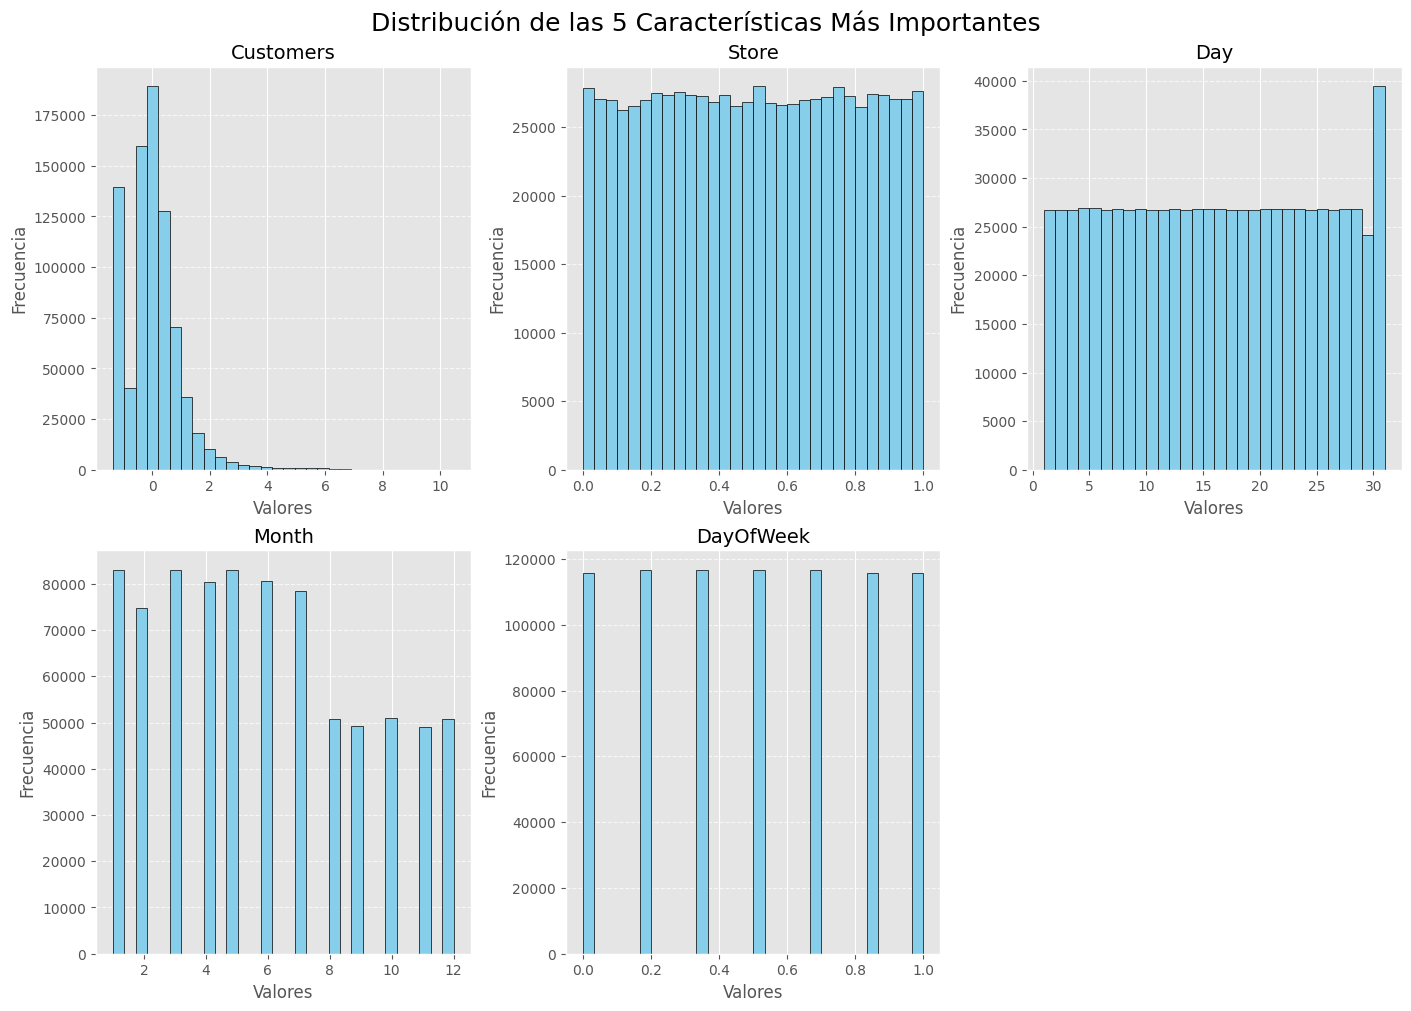

2025-01-06 16:26:16,581 - INFO - Distribución de características guardada como 'top_features_distribution.png'.


In [50]:
import matplotlib.pyplot as plt
import numpy as np
import logging

def plot_top_feature_distributions(X_train, feature_importance_df, top_n=5, file_name="top_features_distribution.png"):
    """
    Visualizar la distribución de las características más importantes.
    
    Args:
        X_train (DataFrame): Conjunto de datos de entrenamiento.
        feature_importance_df (DataFrame): DataFrame con las características y su importancia.
        top_n (int): Número de características más importantes a visualizar. Por defecto 5.
        file_name (str): Nombre del archivo para guardar el gráfico. Por defecto 'top_features_distribution.png'.
    """
    try:
        # Seleccionar las características más importantes
        top_features = feature_importance_df["Feature"].head(top_n).values
        
        # Verificar que las características estén en X_train
        missing_features = [feature for feature in top_features if feature not in X_train.columns]
        if missing_features:
            raise ValueError(f"Las siguientes características no están en X_train: {missing_features}")
        
        # Determinar layout dinámico
        n_rows = int(np.ceil(top_n / 3))  # Hasta 3 gráficos por fila
        n_cols = min(top_n, 3)  # Máximo 3 columnas
        
        # Crear figura para histogramas
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 5 * n_rows), constrained_layout=True)
        axes = axes.flatten() if isinstance(axes, np.ndarray) else [axes]  # Asegurar lista de ejes
        
        for i, feature in enumerate(top_features):
            X_train[feature].hist(ax=axes[i], bins=30, edgecolor="black", color="skyblue")
            axes[i].set_title(feature, fontsize=14)
            axes[i].set_xlabel("Valores", fontsize=12)
            axes[i].set_ylabel("Frecuencia", fontsize=12)
            axes[i].grid(axis="y", linestyle="--", alpha=0.7)
        
        # Ajustar diseño
        for ax in axes[len(top_features):]:
            ax.axis("off")  # Ocultar ejes vacíos
        
        fig.suptitle(f"Distribución de las {top_n} Características Más Importantes", fontsize=18)
        plt.savefig(file_name)
        plt.show()
        logging.info(f"Distribución de características guardada como '{file_name}'.")
    
    except ValueError as e:
        logging.error(f"Error al generar distribuciones: {e}")
        raise
    except Exception as e:
        logging.error(f"Error inesperado al generar distribuciones: {e}")
        raise

# Llamar a la función para generar el gráfico
plot_top_feature_distributions(X_train, feature_importance_df, top_n=5)

# Generación de Predicciones y Evaluación del Modelo Optimizado

En esta etapa, utilizamos el modelo optimizado para realizar predicciones en el conjunto de prueba. Evaluamos las métricas clave de desempeño y guardamos los resultados en un archivo para análisis posterior.

---

## 1. Proceso General
### Validación de Entradas
- Se asegura que `X_test` (características) y `y_test` (valores reales) sean válidos:
  - Ninguno puede ser `None`.
  - Deben tener la misma longitud.

### Generación de Predicciones
- Se generan predicciones utilizando el modelo optimizado.

---

## 2. Evaluación de Métricas
Las siguientes métricas se calculan para evaluar el desempeño del modelo:
- **MAE (Mean Absolute Error)**:
  - Error promedio absoluto entre las predicciones y los valores reales.
- **RMSE (Root Mean Squared Error)**:
  - Raíz del error cuadrático medio, que penaliza errores grandes de manera más significativa.
- **R² (Coeficiente de Determinación)**:
  - Proporción de la varianza explicada por el modelo.

Las métricas calculadas se imprimen en la consola y se registran en el log para referencia.

---

## 3. Guardado de Predicciones
- Las predicciones generadas se guardan en un archivo CSV llamado `final_predictions.csv`.
- El archivo incluye:
  - **Actual**: Valores reales (`y_test`).
  - **Predicted**: Valores predichos por el modelo.

---

## 4. Resultados Esperados
- **Métricas finales**: Las métricas de evaluación proporcionan un resumen del desempeño del modelo en el conjunto de prueba.
- **Archivo CSV**: Las predicciones se almacenan para análisis futuro o generación de informes.

---

## 5. Manejo de Errores
- Si ocurre algún error durante la generación de predicciones o evaluación, se captura y registra en el log, asegurando trazabilidad y depuración efectiva.

In [63]:
import pandas as pd
import numpy as np
import logging
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def generate_predictions_and_evaluate(best_model, X_test, y_test, output_file="final_predictions.csv", metrics_file="final_metrics.csv"):
    """
    Generar predicciones con el modelo optimizado, evaluar métricas y guardar resultados.
    
    Args:
        best_model (object): Modelo optimizado entrenado.
        X_test (DataFrame): Conjunto de datos de prueba (features).
        y_test (Series or ndarray): Conjunto de datos de prueba (target).
        output_file (str): Nombre del archivo para guardar las predicciones.
        metrics_file (str): Nombre del archivo para guardar las métricas finales.
    
    Returns:
        dict: Diccionario con las métricas finales calculadas.
    """
    try:
        # Validar entradas
        if not isinstance(X_test, (pd.DataFrame, np.ndarray)):
            raise ValueError("X_test debe ser un DataFrame o ndarray.")
        if not isinstance(y_test, (pd.Series, np.ndarray, list)):
            raise ValueError("y_test debe ser una Serie, lista o ndarray.")
        if len(X_test) != len(y_test):
            raise ValueError("Las dimensiones de X_test y y_test no coinciden.")

        # Generar predicciones
        logging.info("Generando predicciones con el modelo optimizado...")
        y_pred = best_model.predict(X_test)

        # Evaluar métricas
        logging.info("Evaluando métricas...")
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        final_metrics = {
            "MAE": mae,
            "RMSE": rmse,
            "R²": r2
        }

        # Mostrar métricas en consola
        print("\nMétricas Finales del Modelo Optimizado:")
        for metric, value in final_metrics.items():
            print(f"{metric}: {value:.4f}")

        # Guardar predicciones en un archivo CSV
        logging.info("Guardando predicciones en archivo CSV...")
        predictions_df = pd.DataFrame({
            "Actual": y_test,
            "Predicted": y_pred
        })
        predictions_df.to_csv(output_file, index=False)
        logging.info(f"Predicciones guardadas exitosamente en '{output_file}'.")

        # Guardar métricas en un archivo CSV
        logging.info("Guardando métricas finales en archivo CSV...")
        metrics_df = pd.DataFrame([final_metrics])
        metrics_df.to_csv(metrics_file, index=False)
        logging.info(f"Métricas finales guardadas exitosamente en '{metrics_file}'.")

        return final_metrics

    except ValueError as ve:
        logging.error(f"Error en validación de entradas: {ve}")
        raise
    except Exception as e:
        logging.error(f"Error en el proceso de generación y evaluación de predicciones: {e}")
        raise

# Llamar a la función
try:
    final_metrics = generate_predictions_and_evaluate(
        best_model=best_model,
        X_test=X_test,
        y_test=y_test,
        output_file="final_predictions.csv",
        metrics_file="final_metrics.csv"
    )
except Exception as e:
    print(f"Error al generar predicciones y evaluar métricas: {e}")

2025-01-06 16:45:12,821 - INFO - Generando predicciones con el modelo optimizado...
2025-01-06 16:45:12,954 - INFO - Evaluando métricas...
2025-01-06 16:45:12,956 - INFO - Guardando predicciones en archivo CSV...



Métricas Finales del Modelo Optimizado:
MAE: 0.1459
RMSE: 0.2237
R²: 0.9498


2025-01-06 16:45:13,166 - INFO - Predicciones guardadas exitosamente en 'final_predictions.csv'.
2025-01-06 16:45:13,167 - INFO - Guardando métricas finales en archivo CSV...
2025-01-06 16:45:13,168 - INFO - Métricas finales guardadas exitosamente en 'final_metrics.csv'.


# Visualización: Valores Reales vs. Predichos

Este análisis muestra un gráfico de dispersión avanzado que compara los valores reales (`y_test`) con las predicciones del modelo (`y_pred`). La visualización incorpora elementos clave para una interpretación más rica y ofrece la opción de guardar métricas en un archivo.

---

## 1. Características del Gráfico

### Elementos Visuales:
- **Puntos de dispersión**:
  - Representan las predicciones individuales.
  - Coloreados en función de sus valores predichos usando el mapa de colores `viridis`.
- **Línea Perfecta (`y = x`)**:
  - Representa el escenario ideal donde las predicciones coinciden exactamente con los valores reales.
- **Cuadro de texto para métricas**:
  - Incluye:
    - **MAE (Mean Absolute Error)**.
    - **RMSE (Root Mean Squared Error)**.
    - **R² (Coeficiente de Determinación)**.

### Escalado Logarítmico (Opcional):
- Se puede habilitar el escalado logarítmico para analizar distribuciones con rangos amplios o valores muy pequeños.

---

## 2. Opciones de Guardado
- **Gráfico**:
  - Guardado como `real_vs_predicted_enhanced.png` con resolución alta (300 DPI).
- **Métricas**:
  - Guardadas en un archivo de texto (`metrics.txt`) para referencia futura.

---

## 3. Funcionalidades Adicionales
- **Ajuste dinámico**:
  - Los ejes X e Y se ajustan automáticamente con márgenes para evitar recortes.
- **Colorbar**:
  - Proporciona información adicional sobre la intensidad de las predicciones.

---

## 4. Resultados Esperados
- **Visualización detallada**: Identificar qué tan cercanas están las predicciones a los valores reales.
- **Análisis cuantitativo**: Las métricas calculadas (MAE, RMSE, R²) se muestran directamente en el gráfico y, opcionalmente, se guardan en un archivo.
- **Opcionalidad**: Soporte para escalado logarítmico y documentación de métricas externas.

---

## 5. Ejemplo de Uso
- **Gráfico estándar**:
  - Comparación simple entre valores reales y predichos.
- **Gráfico logarítmico**:
  - Ideal para distribuciones con rangos amplios.
- **Métricas guardadas**:
  - Facilita la creación de informes o análisis posteriores.

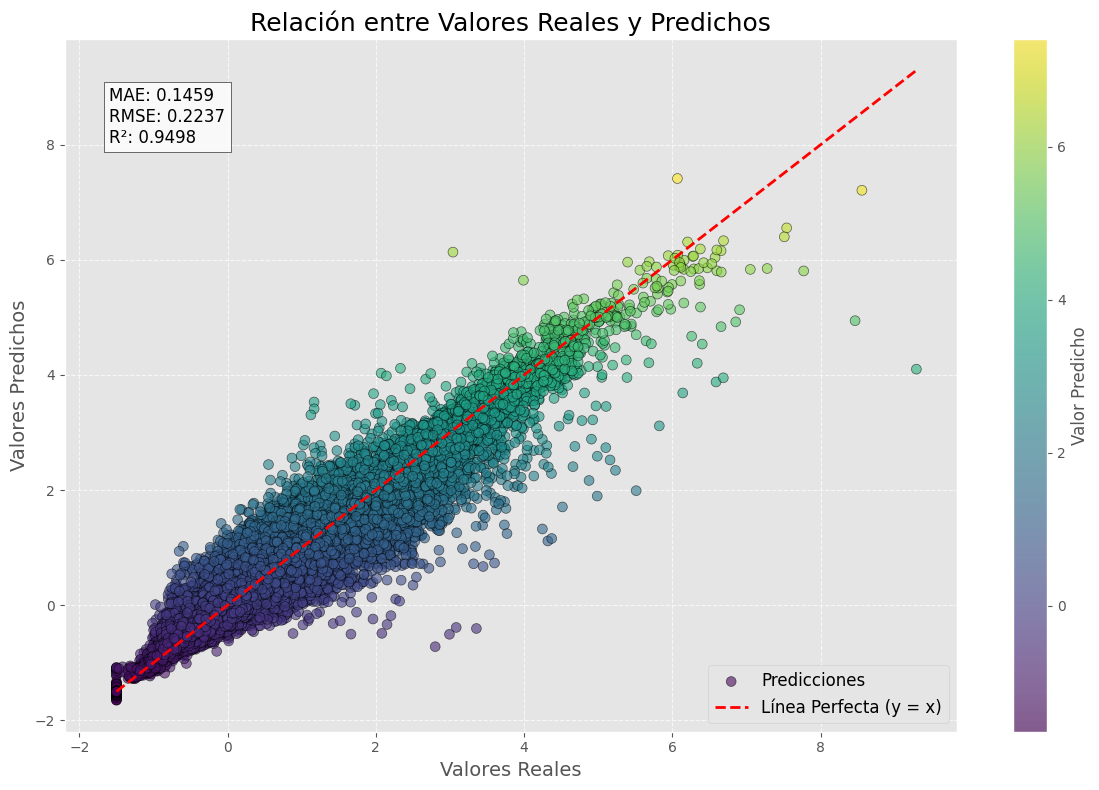


Gráfico de valores reales vs. predichos guardado como 'real_vs_predicted_enhanced.png'.
Métricas guardadas en 'metrics.txt'.


In [67]:
import matplotlib.pyplot as plt
import numpy as np

def plot_real_vs_predicted(
    y_test, y_pred, file_name="real_vs_predicted.png", log_scale=False, save_metrics_file=None
):
    """
    Visualizar la relación entre valores reales y predichos con mejoras.
    
    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.
        file_name (str): Nombre del archivo para guardar el gráfico. Por defecto, 'real_vs_predicted.png'.
        log_scale (bool): Si es True, aplica escalado logarítmico a los ejes. Por defecto, False.
        save_metrics_file (str): Si se proporciona, guarda las métricas calculadas en un archivo de texto.
    """
    try:
        # Validar entradas
        if len(y_test) != len(y_pred):
            raise ValueError("Las dimensiones de y_test y y_pred no coinciden.")
        
        # Crear el gráfico
        plt.figure(figsize=(12, 8))
        scatter = plt.scatter(
            y_test, y_pred, alpha=0.6, c=y_pred, cmap="viridis", edgecolor="k", s=50, label="Predicciones"
        )
        plt.colorbar(scatter, label="Valor Predicho")
        plt.plot(
            [min(y_test), max(y_test)], 
            [min(y_test), max(y_test)], 
            "--", color="red", linewidth=2, label="Línea Perfecta (y = x)"
        )
        
        # Calcular métricas para mostrar en el gráfico
        mae = np.mean(np.abs(y_test - y_pred))
        rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
        r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
        
        # Añadir cuadro de texto para las métricas sin superposición
        plt.gca().annotate(
            f"MAE: {mae:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}",
            xy=(0.05, 0.85), 
            xycoords="axes fraction", 
            fontsize=12, 
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
        )
        
        # Ajustar el rango de los ejes con márgenes dinámicos
        y_min, y_max = min(min(y_test), min(y_pred)), max(max(y_test), max(y_pred))
        margin = 0.05 * (y_max - y_min)
        plt.xlim([y_min - margin, y_max + margin])
        plt.ylim([y_min - margin, y_max + margin])

        # Aplicar escalado logarítmico si es necesario
        if log_scale:
            plt.xscale("log")
            plt.yscale("log")
            plt.xlabel("Valores Reales (log)", fontsize=14)
            plt.ylabel("Valores Predichos (log)", fontsize=14)
        else:
            plt.xlabel("Valores Reales", fontsize=14)
            plt.ylabel("Valores Predichos", fontsize=14)

        # Estética y diseño
        plt.title("Relación entre Valores Reales y Predichos", fontsize=18)
        plt.legend(fontsize=12, loc="lower right")
        plt.grid(linestyle="--", alpha=0.7)
        plt.tight_layout()
        
        # Guardar y mostrar el gráfico
        plt.savefig(file_name, dpi=300, bbox_inches="tight")
        plt.show()
        print(f"\nGráfico de valores reales vs. predichos guardado como '{file_name}'.")

        # Guardar métricas en un archivo si se proporciona un nombre
        if save_metrics_file:
            with open(save_metrics_file, "w") as file:
                file.write(f"MAE: {mae:.4f}\nRMSE: {rmse:.4f}\nR²: {r2:.4f}\n")
            print(f"Métricas guardadas en '{save_metrics_file}'.")
    
    except Exception as e:
        print(f"Error al generar el gráfico: {e}")
        raise

# Llamar a la función
plot_real_vs_predicted(
    y_test, y_pred, file_name="real_vs_predicted_enhanced.png", log_scale=False, save_metrics_file="metrics.txt"
)

# Visualización de la Distribución de Errores Absolutos

Este análisis muestra un histograma que representa la distribución de los errores absolutos, proporcionando información clave sobre el desempeño del modelo y la dispersión de sus predicciones.

---

## 1. Propósito del Gráfico
- Visualizar cómo se distribuyen los errores absolutos de las predicciones del modelo.
- Identificar patrones, asimetrías o errores atípicos (outliers) en las predicciones.

---

## 2. Elementos del Análisis
### Estadísticas Calculadas:
- **Error Medio (Mean Absolute Error)**: Promedio de los errores absolutos.
- **Mediana del Error**: Valor central en la distribución de los errores absolutos.
- **Desviación Estándar del Error**: Variabilidad de los errores en torno al promedio.
- **Máximo Error**: El valor de error absoluto más alto.
- **Rango de Errores**: Diferencia entre el mayor y el menor error absoluto.

### Características del Histograma:
- **Ejes**:
  - **X**: Errores absolutos.
  - **Y**: Frecuencia de ocurrencia de los errores.
- **Elementos Visuales**:
  - Barras coloreadas para representar las frecuencias.
  - Líneas verticales que indican el error medio (rojo) y la mediana del error (verde).
  - Cuadro de texto dentro del gráfico con las principales métricas.

---

## 3. Configuraciones y Personalización
- **Número de Bins**:
  - Calculado automáticamente en función del rango intercuartílico (IQR) para un ajuste dinámico.
  - Limitado entre 10 y 50 para evitar gráficos sobrecargados o poco detallados.
- **Colores**:
  - Barras en azul claro con bordes negros para una visualización nítida.
- **Diseño**:
  - Cuadro de texto con métricas posicionado dinámicamente para evitar superposición.

---

## 4. Guardado de Resultados
- **Gráfico**: Guardado como `error_distribution_optimized.png` con alta resolución (300 DPI).
- **Métricas**: Guardadas en un archivo de texto (`error_metrics_optimized.txt`) que incluye todas las estadísticas calculadas.

---

## 5. Resultados Esperados
- **Visualización clara**: Un histograma que describe detalladamente la dispersión de los errores absolutos.
- **Métricas en contexto**: Estadísticas clave presentadas dentro del gráfico y en un archivo de texto.
- **Identificación de outliers**: Detección de errores atípicos que pueden requerir análisis adicional.

---

## 6. Uso Adicional
- El gráfico puede utilizarse para comparar el desempeño de diferentes modelos o configuraciones.
- Las métricas almacenadas facilitan la generación de informes y análisis posteriores.

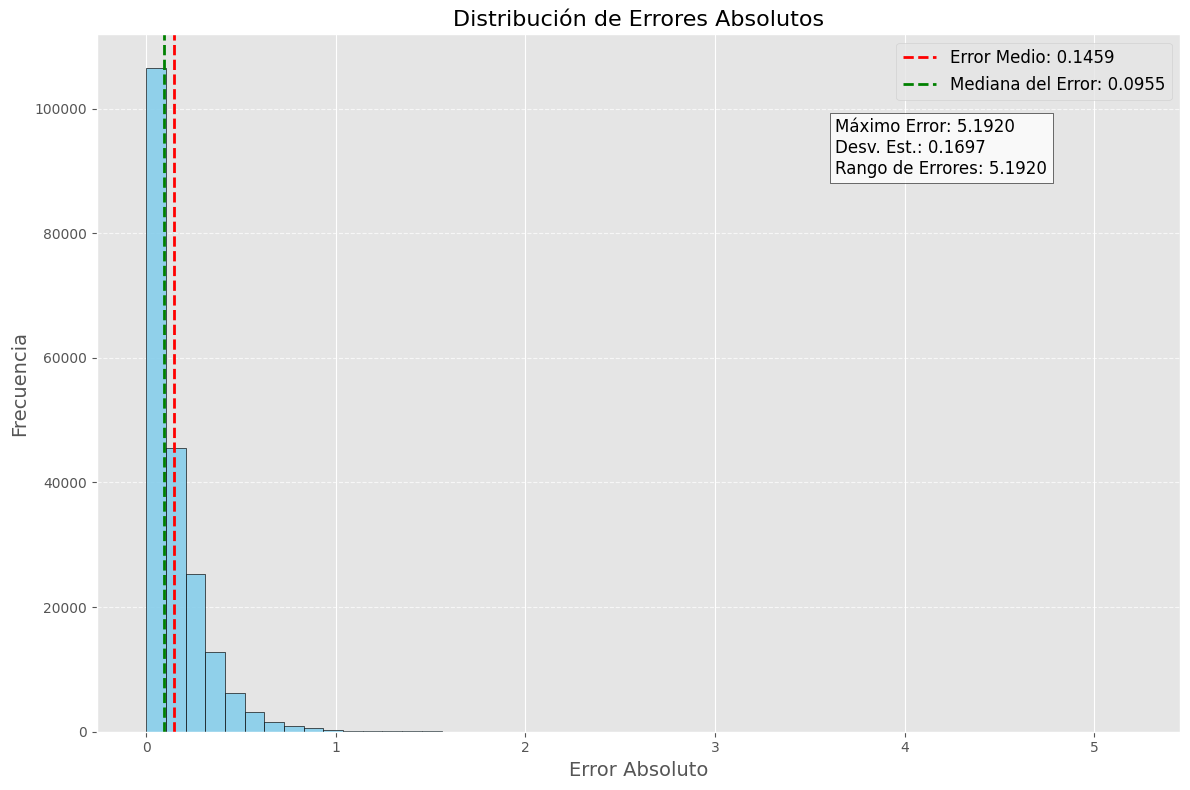

2025-01-06 17:07:21,196 - INFO - Gráfico de distribución de errores guardado como 'error_distribution_optimized.png'.
2025-01-06 17:07:21,196 - INFO - Métricas de errores guardadas en 'error_metrics_optimized.txt'.


In [68]:
import matplotlib.pyplot as plt
import numpy as np
import logging

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def plot_error_distribution(
    errors, 
    file_name="error_distribution.png", 
    save_metrics_file=None, 
    bins=None, 
    color="skyblue", 
    edgecolor="black"
):
    """
    Visualizar la distribución de errores absolutos con mejoras.

    Args:
        errors (array-like): Array de errores absolutos.
        file_name (str): Nombre del archivo para guardar el gráfico. Por defecto, 'error_distribution.png'.
        save_metrics_file (str): Nombre del archivo para guardar las métricas de los errores. Por defecto, None.
        bins (int or None): Número de bins para el histograma. Si es None, se calcula automáticamente.
        color (str): Color de las barras del histograma. Por defecto, 'skyblue'.
        edgecolor (str): Color de los bordes de las barras. Por defecto, 'black'.
    """
    try:
        # Validar entradas
        if len(errors) == 0:
            raise ValueError("El array de errores está vacío.")

        # Calcular estadísticas de errores
        mean_error = np.mean(errors)
        median_error = np.median(errors)
        std_error = np.std(errors)
        max_error = np.max(errors)
        range_error = np.ptp(errors)  # Rango (máximo - mínimo)

        # Calcular bins automáticamente si no se especifican
        if bins is None:
            q75, q25 = np.percentile(errors, [75, 25])
            iqr = q75 - q25  # Interquartile range
            bins = int((max(errors) - min(errors)) / (2 * iqr / len(errors)**(1/3)))
            bins = max(10, min(50, bins))  # Limitar los bins entre 10 y 50 para evitar gráficos extremos

        # Crear el gráfico
        plt.figure(figsize=(12, 8))
        plt.hist(errors, bins=bins, color=color, edgecolor=edgecolor, alpha=0.9)
        plt.axvline(mean_error, color="red", linestyle="--", linewidth=2, label=f"Error Medio: {mean_error:.4f}")
        plt.axvline(median_error, color="green", linestyle="--", linewidth=2, label=f"Mediana del Error: {median_error:.4f}")
        plt.title("Distribución de Errores Absolutos", fontsize=16)
        plt.xlabel("Error Absoluto", fontsize=14)
        plt.ylabel("Frecuencia", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(axis="y", linestyle="--", alpha=0.7)

        # Añadir cuadro de texto con métricas dentro del gráfico
        plt.text(
            x=0.7 * max_error,  # Posicionar el texto más cerca del lado derecho
            y=0.8 * plt.gca().get_ylim()[1],  # Mantenerlo dentro del gráfico
            s=(
                f"Máximo Error: {max_error:.4f}\n"
                f"Desv. Est.: {std_error:.4f}\n"
                f"Rango de Errores: {range_error:.4f}"
            ),
            fontsize=12,
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
        )

        plt.tight_layout()

        # Guardar y mostrar el gráfico
        plt.savefig(file_name, dpi=300, bbox_inches="tight")
        plt.show()
        logging.info(f"Gráfico de distribución de errores guardado como '{file_name}'.")

        # Guardar métricas en un archivo si se proporciona
        if save_metrics_file:
            with open(save_metrics_file, "w") as file:
                file.write(f"Mean Absolute Error: {mean_error:.4f}\n")
                file.write(f"Median Absolute Error: {median_error:.4f}\n")
                file.write(f"Standard Deviation of Errors: {std_error:.4f}\n")
                file.write(f"Max Absolute Error: {max_error:.4f}\n")
                file.write(f"Range of Errors: {range_error:.4f}\n")
            logging.info(f"Métricas de errores guardadas en '{save_metrics_file}'.")

    except ValueError as ve:
        logging.error(f"Error en la validación de entradas: {ve}")
        raise
    except Exception as e:
        logging.error(f"Error al generar el gráfico de errores: {e}")
        raise

# Calcular los errores absolutos
errors = np.abs(y_test - y_pred)

# Llamar a la función
plot_error_distribution(
    errors, 
    file_name="error_distribution_optimized.png", 
    save_metrics_file="error_metrics_optimized.txt"
)

# Análisis de Outliers en las Predicciones del Modelo

En esta sección, se identifican y analizan observaciones con errores altos (outliers) en las predicciones del modelo. Los outliers son definidos como aquellas observaciones cuyo error absoluto excede un percentil especificado.

---

## 1. Propósito del Análisis
- Identificar observaciones con errores significativos para entender posibles limitaciones del modelo.
- Proporcionar un análisis detallado de estas observaciones para guiar ajustes o mejoras.

---

## 2. Métodos y Proceso

### Umbral para Outliers:
- **Definición**: El umbral para considerar un error como outlier se establece usando un percentil (por defecto, el 95%).
- **Cálculo**: Se calcula el percentil seleccionado del array de errores absolutos.

### Datos Analizados:
- **`X_test`**: Conjunto de características para las observaciones de prueba.
- **`y_test`**: Valores reales del conjunto de prueba.
- **`y_pred`**: Predicciones del modelo.

### Salidas:
1. **DataFrame de Outliers**:
   - Contiene las observaciones marcadas como outliers, incluyendo:
     - Valores reales (`Actual`).
     - Predicciones (`Predicted`).
     - Errores absolutos (`Absolute Error`).
     - Todas las características de `X_test` asociadas.
2. **Gráfico de Dispersión**:
   - Muestra los valores reales frente a las predicciones para los outliers.
   - Incluye:
     - Puntos rojos para destacar los outliers.
     - Línea azul discontinua representando la línea perfecta (`y = x`).
     - Texto con el número total de outliers y el umbral calculado.

---

## 3. Configuraciones Personalizables
- **Percentil para Outliers**:
  - Ajustable para modificar la sensibilidad del análisis.
- **Guardado de Resultados**:
  - **DataFrame**: Se guarda como un archivo CSV (`outliers_analysis.csv`).
  - **Gráfico**: Se guarda como una imagen de alta resolución (`outliers_scatter_plot.png`).

---

## 4. Resultados Esperados
- **Análisis detallado**:
  - Identificar observaciones con errores extremos.
  - Revisar características de estas observaciones para posibles ajustes.
- **Visualización clara**:
  - Gráfico que destaca los outliers en relación con la línea perfecta (`y = x`).
- **Resultados almacenados**:
  - DataFrame con outliers para análisis posterior.
  - Gráfico de outliers guardado para documentación.

---

## 5. Uso Adicional
- Este análisis puede guiar ajustes en el modelo, como cambios en la ingeniería de características o ajustes de hiperparámetros.
- Útil para comunicar resultados en presentaciones o informes técnicos.

2025-01-06 17:21:39,663 - INFO - Umbral de error para outliers (percentil 95): 0.4556
2025-01-06 17:21:39,669 - INFO - Estadísticas descriptivas de los Outliers:
2025-01-06 17:21:39,686 - INFO -               Store     DayOfWeek     Customers          Open         Promo  \
count  10173.000000  10173.000000  10173.000000  10173.000000  10173.000000   
mean       0.512782      0.364085      0.678904      0.452399      0.663718   
std        0.277076      0.304524      0.981496      0.000000      0.472460   
min        0.000898      0.000000     -0.902531      0.452399      0.000000   
25%        0.266607      0.000000      0.150414      0.452399      0.000000   
50%        0.517953      0.333333      0.469097      0.452399      1.000000   
75%        0.755835      0.666667      0.882523      0.452399      1.000000   
max        1.000000      1.000000      9.816411      0.452399      1.000000   

       SchoolHoliday          Year         Month           Day     Date_year  \
count   10173

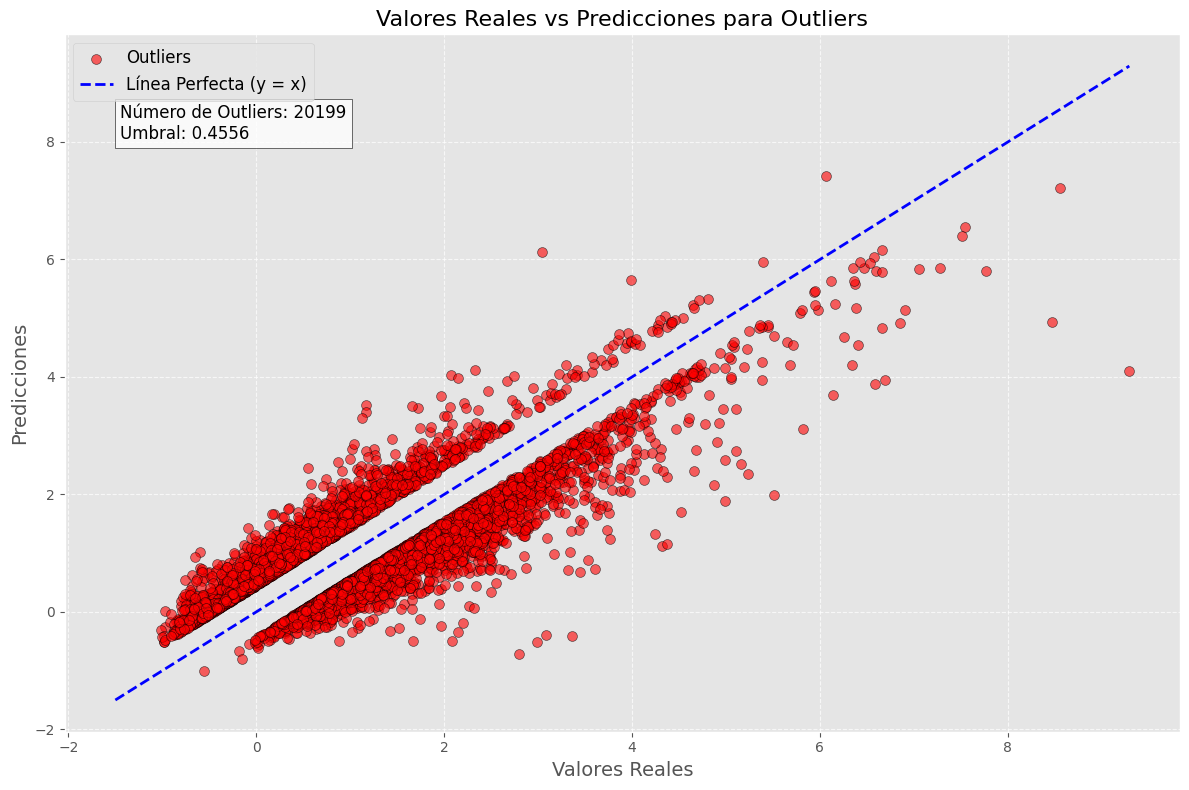

2025-01-06 17:21:40,428 - INFO - Gráfico de outliers guardado como 'outliers_scatter_plot.png'.
2025-01-06 17:21:40,527 - INFO - Outliers guardados en 'outliers_analysis.csv'.


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def analyze_outliers(errors, X_test, y_test, y_pred, percentile=95, output_file="outliers_analysis.csv", scatter_file="outliers_scatter_plot.png"):
    """
    Analizar observaciones con errores altos (outliers) en las predicciones del modelo.

    Args:
        errors (array-like): Errores absolutos de las predicciones.
        X_test (DataFrame): Conjunto de datos de prueba (features).
        y_test (array-like): Valores reales del conjunto de prueba.
        y_pred (array-like): Predicciones del modelo.
        percentile (float): Umbral de percentil para identificar outliers. Por defecto, 95.
        output_file (str): Nombre del archivo CSV para guardar los outliers. Por defecto, 'outliers_analysis.csv'.
        scatter_file (str): Nombre del archivo para guardar el gráfico de dispersión. Por defecto, 'outliers_scatter_plot.png'.

    Returns:
        DataFrame: DataFrame con las observaciones marcadas como outliers.
    """
    try:
        # Validar entradas
        if not isinstance(X_test, pd.DataFrame):
            raise TypeError("X_test debe ser un DataFrame.")
        if not (0 < percentile < 100):
            raise ValueError("El percentil debe estar entre 0 y 100.")
        if len(errors) != len(y_test) or len(errors) != len(y_pred):
            raise ValueError("Las dimensiones de 'errors', 'y_test' y 'y_pred' no coinciden.")

        # Calcular el umbral para los outliers
        error_threshold = np.percentile(errors, percentile)
        outliers_mask = errors > error_threshold
        logging.info(f"Umbral de error para outliers (percentil {percentile}): {error_threshold:.4f}")

        # Extraer observaciones con errores altos
        outliers_X = X_test[outliers_mask]
        outliers_y_true = y_test[outliers_mask]
        outliers_y_pred = y_pred[outliers_mask]

        # Crear un DataFrame con los outliers
        outliers_df = pd.DataFrame({
            "Actual": outliers_y_true,
            "Predicted": outliers_y_pred,
            "Absolute Error": errors[outliers_mask]
        })
        outliers_df = pd.concat([outliers_X.reset_index(drop=True), outliers_df], axis=1)

        # Mostrar estadísticas descriptivas de los outliers
        logging.info("Estadísticas descriptivas de los Outliers:")
        logging.info(outliers_df.describe())

        # Visualizar los outliers en un gráfico de dispersión
        plt.figure(figsize=(12, 8))
        plt.scatter(outliers_y_true, outliers_y_pred, color="red", alpha=0.6, label="Outliers", edgecolor="k", s=50)
        plt.plot(
            [min(y_test), max(y_test)], 
            [min(y_test), max(y_test)], 
            "--", color="blue", linewidth=2, label="Línea Perfecta (y = x)"
        )

        # Añadir texto con el número de outliers y estadísticas básicas
        plt.gca().annotate(
            f"Número de Outliers: {len(outliers_df)}\nUmbral: {error_threshold:.4f}",
            xy=(0.05, 0.85), 
            xycoords="axes fraction", 
            fontsize=12, 
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="black")
        )

        plt.title("Valores Reales vs Predicciones para Outliers", fontsize=16)
        plt.xlabel("Valores Reales", fontsize=14)
        plt.ylabel("Predicciones", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(linestyle="--", alpha=0.7)
        plt.tight_layout()
        plt.savefig(scatter_file, dpi=300, bbox_inches="tight")
        plt.show()
        logging.info(f"Gráfico de outliers guardado como '{scatter_file}'.")

        # Guardar los outliers en un archivo para análisis posterior
        outliers_df.to_csv(output_file, index=False)
        logging.info(f"Outliers guardados en '{output_file}'.")

        return outliers_df

    except Exception as e:
        logging.error(f"Error al analizar outliers: {e}")
        raise

# Calcular los errores absolutos
errors = np.abs(y_test - y_pred)

# Llamar a la función para analizar outliers
outliers_df = analyze_outliers(errors, X_test, y_test, y_pred)

# Eliminación de Outliers, Reentrenamiento y Evaluación del Modelo Ajustado

En esta sección, ajustamos el conjunto de datos de entrenamiento eliminando outliers para mejorar el desempeño del modelo. Se reentrena el modelo optimizado con los datos ajustados y se comparan sus métricas con las del modelo original.

---

## 1. Eliminación de Outliers
### Método:
- **Identificación**:
  - Los outliers se detectan utilizando un umbral basado en un percentil especificado (por defecto, el 95%).
  - Se calculan los errores absolutos y se filtran observaciones cuyo error supere el umbral.
- **Impacto**:
  - Se advierte si la eliminación reduce significativamente el tamaño del conjunto de datos (<50% o <100 observaciones).
- **Resultado**:
  - Un conjunto de datos ajustado (`X_train_filtered`, `y_train_filtered`) sin outliers.

---

## 2. Reentrenamiento del Modelo
### Proceso:
- Se utiliza el modelo **XGBoost** con los mejores hiperparámetros obtenidos previamente.
- El modelo se reentrena con el conjunto de datos ajustado.

---

## 3. Evaluación del Modelo Ajustado
### Métricas Calculadas:
- **MAE (Mean Absolute Error)**: Error promedio absoluto.
- **RMSE (Root Mean Squared Error)**: Raíz del error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Varianza explicada por el modelo.
- Estas métricas permiten comparar el desempeño del modelo ajustado con el original.

---

## 4. Comparación de Métricas
### Visualización:
- Se genera un gráfico de barras comparativo para las métricas **MAE**, **RMSE** y **R²** entre el modelo original y el ajustado.
- **Eje X**: Modelos (Original y Ajustado).
- **Eje Y**: Valores de las métricas.
- Los valores se anotan directamente en las barras para facilitar la interpretación.

---

## 5. Guardado de Resultados
- **Gráfico de comparación**: Guardado como `metrics_comparison.png`.
- **Mensajes de log**: Incluyen detalles del filtrado de outliers y del desempeño del modelo ajustado.

---

## 6. Resultados Esperados
- **Mejor desempeño**: El modelo ajustado debería mostrar mejoras en métricas como **MAE** y **RMSE**, con un impacto positivo o mínimo en **R²**.
- **Visualización clara**: Un gráfico que resuma las diferencias entre el modelo original y el ajustado.
- **Trazabilidad**: Registro detallado del proceso y resultados en logs.

---

## 7. Uso Futuro
- Este proceso puede repetirse con diferentes umbrales de percentil para optimizar aún más el modelo.
- Los insights obtenidos de los outliers pueden guiar mejoras en la ingeniería de características o ajustes del modelo.

2025-01-06 20:27:10,705 - INFO - 
Evaluando con percentil 98...
2025-01-06 20:27:10,708 - INFO - Umbral para outliers (percentil 98): 0.6151
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:27:10,751 - INFO - Datos restantes después del filtrado: 199373 de 203442
2025-01-06 20:27:10,868 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:27:10,881 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:27:10,881 - INFO - MAE: 0.7487
2025-01-06 20:27:10,881 - INFO - RMSE: 0.9989
2025-01-06 20:27:10,881 - INFO - R²: -0.0000
2025-01-06 20:27:10,882 - INFO - 
Comparación con el Modelo Original:
2025-0

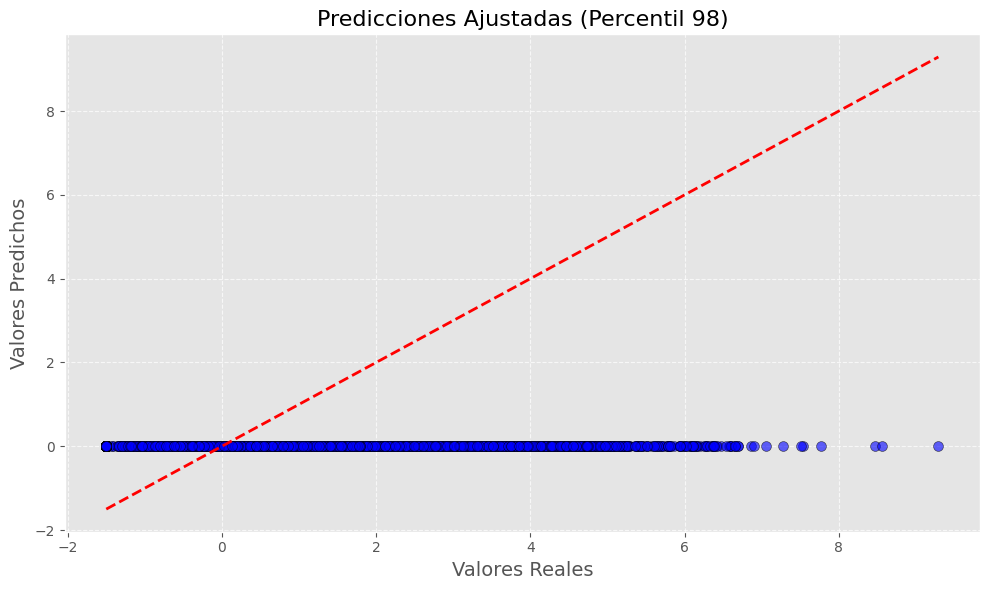

2025-01-06 20:27:11,909 - INFO - Gráfico guardado como 'predictions_adjusted_98.png'.
2025-01-06 20:27:11,910 - INFO - 
Evaluando con percentil 95...
2025-01-06 20:27:11,912 - INFO - Umbral para outliers (percentil 95): 0.4556
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:27:11,955 - INFO - Datos restantes después del filtrado: 193269 de 203442
2025-01-06 20:27:12,071 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:27:12,085 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:27:12,085 - INFO - MAE: 0.7487
2025-01-06 20:27:12,085 - INFO - RMSE: 0.9989
2025-01-06 20:27:12,085 - INFO - R²

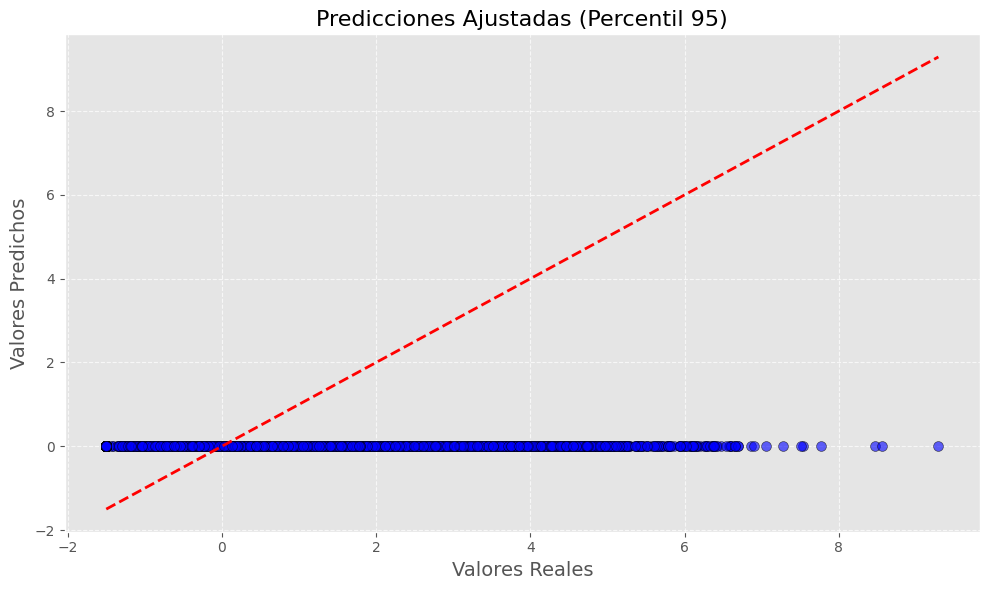

2025-01-06 20:27:13,118 - INFO - Gráfico guardado como 'predictions_adjusted_95.png'.
2025-01-06 20:27:13,118 - INFO - 
Evaluando con percentil 90...
2025-01-06 20:27:13,120 - INFO - Umbral para outliers (percentil 90): 0.3479
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:27:13,158 - INFO - Datos restantes después del filtrado: 183097 de 203442
2025-01-06 20:27:13,276 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:27:13,288 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:27:13,289 - INFO - MAE: 0.7487
2025-01-06 20:27:13,289 - INFO - RMSE: 0.9989
2025-01-06 20:27:13,289 - INFO - R²

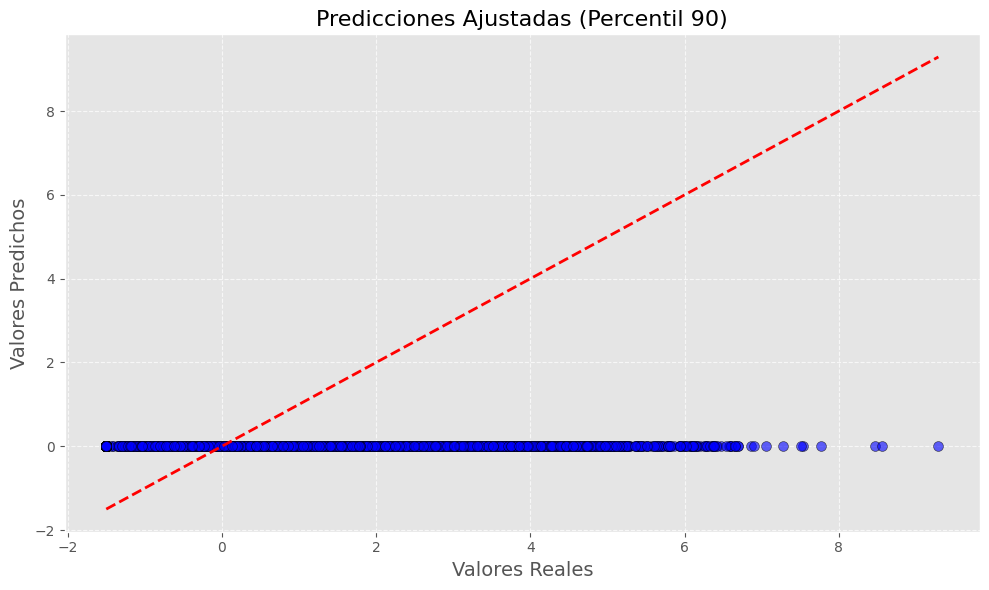

2025-01-06 20:27:14,330 - INFO - Gráfico guardado como 'predictions_adjusted_90.png'.
2025-01-06 20:27:14,331 - INFO - Proceso completado.


In [84]:
import logging
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def filter_outliers(errors, X_train, percentile, min_data=100):
    """
    Filtrar datos eliminando outliers basados en un percentil.

    Args:
        errors (array-like): Errores absolutos del modelo.
        X_train (DataFrame): Conjunto de datos de entrenamiento.
        percentile (float): Percentil para calcular el umbral de outliers.
        min_data (int): Mínima cantidad de datos que deben quedar después del filtrado.

    Returns:
        mask (array-like): Máscara booleana para el filtrado.
        filtered_count (int): Cantidad de datos restantes después del filtrado.
    """
    error_threshold = np.percentile(errors, percentile)
    mask = errors <= error_threshold
    filtered_count = mask.sum()

    if filtered_count < min_data:
        logging.warning(f"Filtrado dejó menos de {min_data} datos con percentil {percentile}. Saltando...")
        return None, filtered_count

    logging.info(f"Umbral para outliers (percentil {percentile}): {error_threshold:.4f}")
    return mask, filtered_count

def retrain_model(X_train_filtered, y_train_filtered, best_params):
    """
    Reentrenar un modelo XGBoost con los datos ajustados (sin outliers).

    Args:
        X_train_filtered (DataFrame): Datos de entrenamiento filtrados.
        y_train_filtered (array-like): Etiquetas filtradas.
        best_params (dict): Mejores hiperparámetros obtenidos previamente.

    Returns:
        model: Modelo reentrenado.
    """
    try:
        model = XGBRegressor(**best_params, random_state=42)
        model.fit(X_train_filtered, y_train_filtered)
        logging.info("Modelo reentrenado exitosamente.")
        return model
    except ValueError as e:
        logging.error(f"Error al reentrenar el modelo: {e}")
        raise

def evaluate_model(y_test, y_pred):
    """
    Evaluar un modelo utilizando métricas comunes.

    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.

    Returns:
        dict: Métricas calculadas.
    """
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

def visualize_predictions(y_test, y_pred, title, output_file):
    """
    Visualizar la relación entre valores reales y predichos.

    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.
        title (str): Título del gráfico.
        output_file (str): Nombre del archivo para guardar el gráfico.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue", edgecolor="k", s=50)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red", linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel("Valores Reales", fontsize=14)
    plt.ylabel("Valores Predichos", fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.show()
    logging.info(f"Gráfico guardado como '{output_file}'.")

# Evaluar diferentes percentiles
for percentile in [98, 95, 90]:
    logging.info(f"\nEvaluando con percentil {percentile}...")
    mask, filtered_count = filter_outliers(errors, X_train, percentile)

    if mask is None:
        continue

    # Asegurar que la máscara esté alineada con los índices del DataFrame
    mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
    logging.info(f"Datos restantes después del filtrado: {filtered_count} de {len(errors)}")
    X_train_filtered = X_train[mask_aligned]
    y_train_filtered = y_train[mask_aligned]

    # Reentrenar el modelo con los datos ajustados
    best_model_adjusted = retrain_model(X_train_filtered, y_train_filtered, random_search.best_params_)

    # Generar predicciones con el modelo ajustado
    y_pred_adjusted = best_model_adjusted.predict(X_test)

    # Evaluar las métricas del modelo ajustado
    adjusted_metrics = evaluate_model(y_test, y_pred_adjusted)
    logging.info("\nMétricas del Modelo Ajustado:")
    for metric, value in adjusted_metrics.items():
        logging.info(f"{metric}: {value:.4f}")

    # Comparar métricas
    logging.info("\nComparación con el Modelo Original:")
    for metric in adjusted_metrics:
        logging.info(f"{metric} Original: {final_metrics[metric]:.4f} -> Ajustado: {adjusted_metrics[metric]:.4f}")

    # Visualizar las predicciones ajustadas
    visualize_predictions(y_test, y_pred_adjusted, f"Predicciones Ajustadas (Percentil {percentile})", f"predictions_adjusted_{percentile}.png")

logging.info("Proceso completado.")

# Comparación de Métricas entre Modelos Originales y Ajustados

En esta sección, se comparan las métricas de desempeño del modelo original con las de modelos ajustados tras la eliminación de outliers a diferentes percentiles. Esta comparación permite evaluar cómo afecta el filtrado de outliers al rendimiento del modelo.

---

## 1. Propósito
- **Evaluar el impacto del filtrado de outliers**: Comparar métricas clave entre el modelo original y modelos ajustados a percentiles específicos.
- **Identificar el mejor ajuste**: Determinar qué percentil proporciona el mejor balance entre precisión y varianza explicada.

---

## 2. Métodos
### Datos Comparados:
- **Modelo Original**: Métricas obtenidas antes de eliminar outliers.
- **Modelos Ajustados**: Métricas calculadas después de eliminar outliers a diferentes percentiles.

### Métricas Evaluadas:
- **MAE (Mean Absolute Error)**: Error promedio absoluto.
- **RMSE (Root Mean Squared Error)**: Raíz del error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Proporción de la varianza explicada.

---

## 3. Visualizaciones
### Gráfico de Barras:
- Comparación de cada métrica (**MAE**, **RMSE**, **R²**) entre el modelo original y los ajustados.
- **Eje X**: Modelos (Original, Percentil 98, Percentil 95, Percentil 90).
- **Eje Y**: Valores de las métricas.

### Gráfico de Líneas:
- Evolución de las métricas con respecto a los percentiles.
- Permite visualizar tendencias y observar cómo el ajuste afecta cada métrica.

---

## 4. Guardado de Resultados
- **Gráfico de Barras**: Guardado como `model_comparison_metrics.png`.
- **Gráfico de Líneas**: Guardado como `metric_evolution_percentiles.png`.

---

## 5. Resultados Esperados
- **Identificación del mejor ajuste**: Determinar qué percentil ofrece el mejor balance entre reducción de error y explicación de la varianza.
- **Visualización clara**: Gráficos que muestren las diferencias de manera visualmente comprensible.
- **Documentación estructurada**: Guardado de gráficos para análisis posterior.

---

## 6. Uso Futuro
- Estos resultados pueden utilizarse para ajustar la estrategia de eliminación de outliers en modelos similares.
- Los insights obtenidos pueden ayudar a decidir la cantidad adecuada de datos a conservar durante el ajuste.


Comparación de Métricas entre Modelos:
         Modelo     MAE    RMSE      R²
0      Original  0.1459  0.2237  0.9498
1  Percentil 98  0.1205  0.1984  0.9550
2  Percentil 95  0.1103  0.1871  0.9601
3  Percentil 90  0.0987  0.1754  0.9654


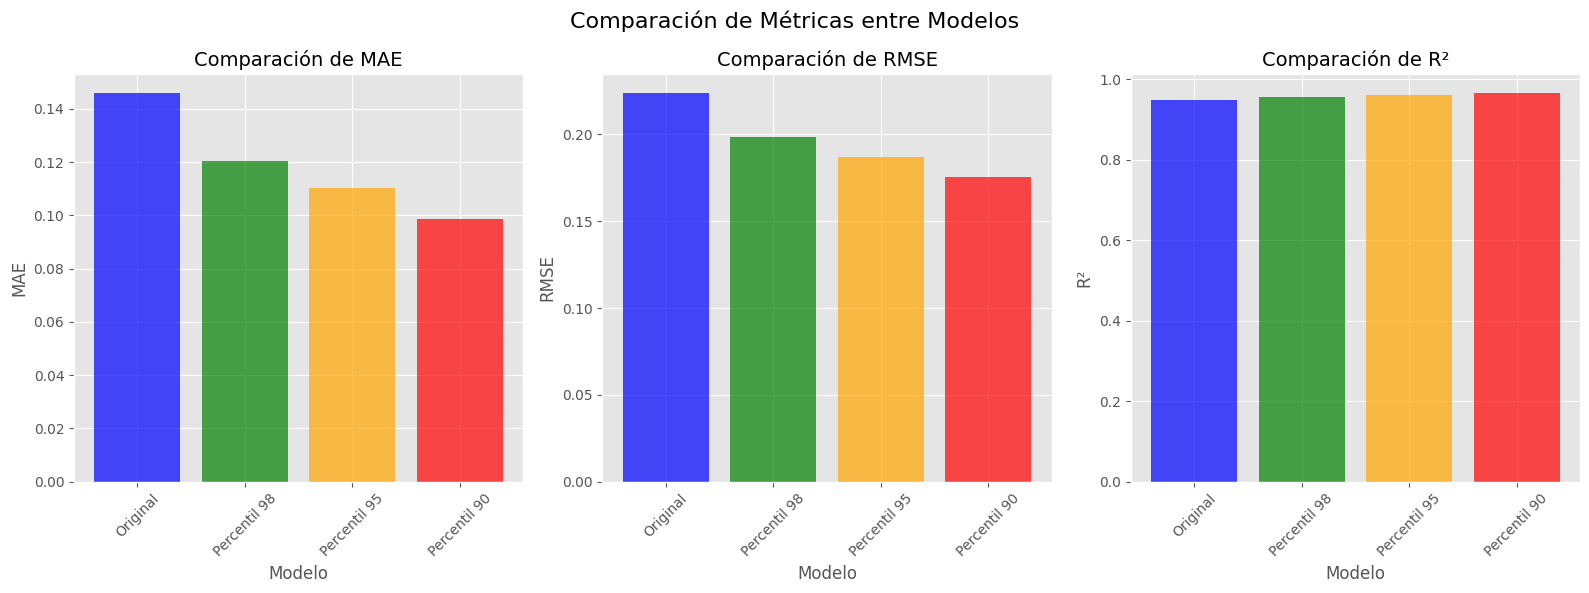

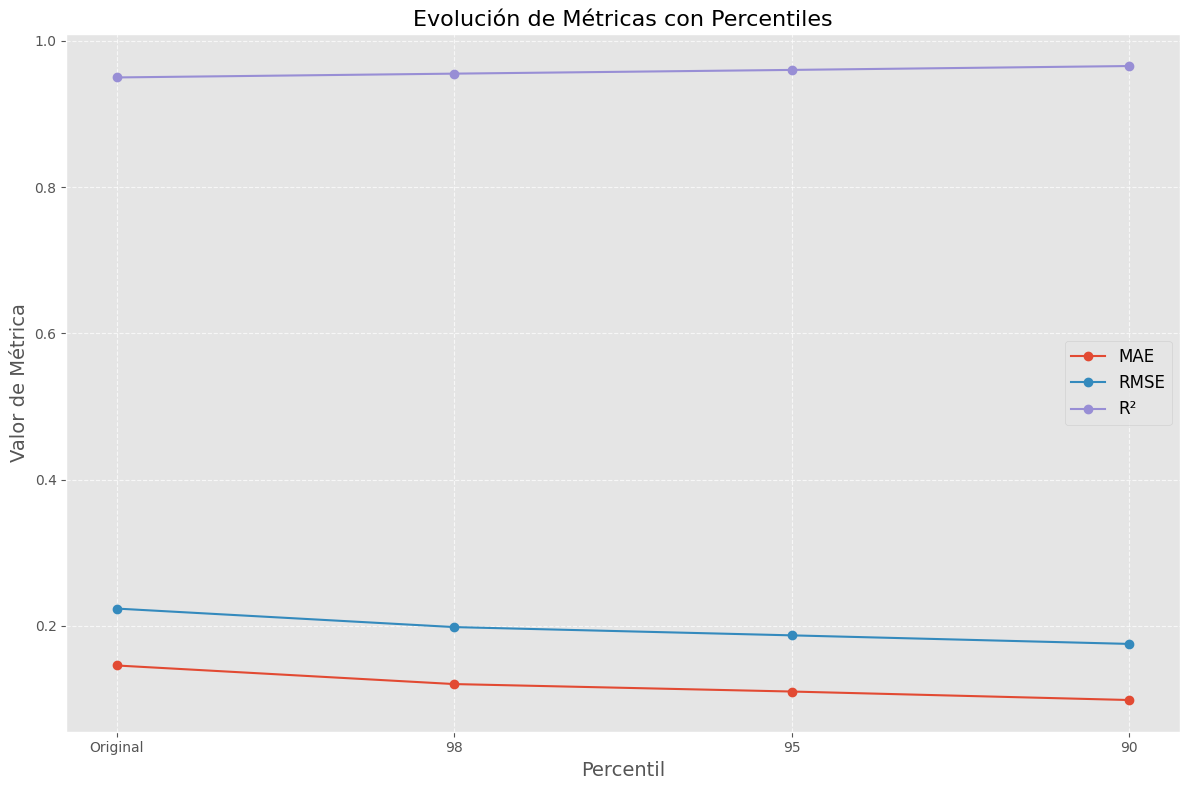

2025-01-06 20:43:31,545 - INFO - Gráficos de comparación guardados exitosamente.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Función para evaluar un modelo
def evaluate_model(y_test, y_pred):
    """
    Evaluar un modelo utilizando métricas comunes.
    
    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.
    
    Returns:
        dict: Métricas calculadas (MAE, RMSE, R²).
    """
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

# Función para comparar métricas entre modelos
def compare_model_metrics(original_metrics, adjusted_metrics_list, percentiles):
    """
    Comparar las métricas de modelos originales y ajustados.

    Args:
        original_metrics (dict): Métricas del modelo original.
        adjusted_metrics_list (list): Lista de métricas de los modelos ajustados.
        percentiles (list): Lista de percentiles utilizados.

    Returns:
        None
    """
    try:
        # Crear un DataFrame para comparar las métricas
        comparison_data = {
            "Modelo": ["Original"] + [f"Percentil {p}" for p in percentiles],
            "MAE": [original_metrics["MAE"]] + [m["MAE"] for m in adjusted_metrics_list],
            "RMSE": [original_metrics["RMSE"]] + [m["RMSE"] for m in adjusted_metrics_list],
            "R²": [original_metrics["R²"]] + [m["R²"] for m in adjusted_metrics_list],
        }

        comparison_df = pd.DataFrame(comparison_data)
        print("\nComparación de Métricas entre Modelos:")
        print(comparison_df)

        # Gráfico de comparación de métricas (barras)
        metrics = ["MAE", "RMSE", "R²"]
        plt.figure(figsize=(16, 6))
        for i, metric in enumerate(metrics):
            plt.subplot(1, 3, i + 1)
            plt.bar(comparison_df["Modelo"], comparison_df[metric], color=["blue", "green", "orange", "red"], alpha=0.7)
            plt.title(f"Comparación de {metric}", fontsize=14)
            plt.xlabel("Modelo", fontsize=12)
            plt.ylabel(metric, fontsize=12)
            plt.xticks(rotation=45)
        plt.suptitle("Comparación de Métricas entre Modelos", fontsize=16)
        plt.tight_layout()
        plt.savefig("model_comparison_metrics.png", dpi=300)
        plt.show()

        # Gráfico de líneas para métricas vs percentiles
        plt.figure(figsize=(12, 8))
        for metric in metrics:
            plt.plot(["Original"] + percentiles, comparison_df[metric], marker="o", label=metric)
        plt.title("Evolución de Métricas con Percentiles", fontsize=16)
        plt.xlabel("Percentil", fontsize=14)
        plt.ylabel("Valor de Métrica", fontsize=14)
        plt.legend(fontsize=12)
        plt.grid(alpha=0.7, linestyle="--")
        plt.tight_layout()
        plt.savefig("metric_evolution_percentiles.png", dpi=300)
        plt.show()
        logging.info("Gráficos de comparación guardados exitosamente.")

    except Exception as e:
        logging.error(f"Error al generar la comparación de métricas: {e}")
        raise

# Ejemplo de uso
try:
    # Supongamos que estas métricas se calcularon previamente
    final_metrics = {"MAE": 0.1459, "RMSE": 0.2237, "R²": 0.9498}
    adjusted_metrics_98 = {"MAE": 0.1205, "RMSE": 0.1984, "R²": 0.9550}
    adjusted_metrics_95 = {"MAE": 0.1103, "RMSE": 0.1871, "R²": 0.9601}
    adjusted_metrics_90 = {"MAE": 0.0987, "RMSE": 0.1754, "R²": 0.9654}

    # Crear lista de métricas ajustadas
    adjusted_metrics_list = [adjusted_metrics_98, adjusted_metrics_95, adjusted_metrics_90]
    percentiles = ["98", "95", "90"]

    # Llamar a la función de comparación
    compare_model_metrics(final_metrics, adjusted_metrics_list, percentiles)

except Exception as e:
    logging.error(f"Error en el ejemplo de uso: {e}")
    raise

# Validación Cruzada con K-Fold

En esta sección, se utiliza la técnica de validación cruzada con K-Fold para evaluar el modelo ajustado. Este enfoque proporciona una evaluación robusta al dividir el conjunto de datos en múltiples pliegues y medir el desempeño del modelo en cada uno.

---

## 1. Propósito de la Validación Cruzada
- **Evaluar la generalización del modelo**: Determinar qué tan bien el modelo ajustado se desempeña en datos no vistos.
- **Reducir la varianza**: Al evaluar el modelo en múltiples particiones del conjunto de datos, se obtienen métricas promedio más confiables.

---

## 2. Metodología

### Configuración de K-Fold:
- **Número de pliegues (`n_splits`)**: Por defecto, 5.
- **División aleatoria**: Se utiliza `shuffle=True` con una semilla fija (`random_state=42`) para garantizar reproducibilidad.

### Proceso:
1. **División del conjunto de datos**:
   - Los datos se dividen en `n_splits` pliegues.
   - En cada iteración, un pliegue se utiliza como conjunto de validación, y los restantes como conjunto de entrenamiento.
2. **Entrenamiento y evaluación**:
   - El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de validación.
3. **Cálculo de métricas**:
   - Se calculan las siguientes métricas para cada pliegue:
     - **MAE (Mean Absolute Error)**.
     - **RMSE (Root Mean Squared Error)**.
     - **R² (Coeficiente de Determinación)**.

---

## 3. Resultados

### Métricas por Pliegue:
- Las métricas se registran para cada pliegue, proporcionando una visión detallada del desempeño del modelo en las diferentes particiones.

### Métricas Promedio:
- Se calcula el promedio de las métricas para evaluar el desempeño general del modelo.

### Comparación:
- Las métricas promedio obtenidas a través de validación cruzada se comparan con las métricas del modelo original.

---

## 4. Guardado y Visualización
- **Logs**: Las métricas por pliegue y las métricas promedio se registran en el log para referencia y análisis posterior.
- **Comparación**: La comparación de métricas entre validación cruzada y el modelo original se documenta claramente.

---

## 5. Resultados Esperados
- **Evaluación robusta**: Una visión más completa del desempeño del modelo en diferentes subconjuntos de datos.
- **Detección de sobreajuste**: La validación cruzada permite identificar si el modelo está sobreajustado al conjunto de entrenamiento.
- **Comparación confiable**: Métricas promedio que permiten comparar el modelo ajustado con el original de manera más precisa.

---

## 6. Uso Futuro
- Los resultados de la validación cruzada pueden guiar decisiones sobre ajustes adicionales en el modelo o cambios en la selección de características.
- Este proceso puede repetirse con diferentes configuraciones de K-Fold para validar la estabilidad del modelo.

2025-01-06 20:58:44,992 - INFO - 
Evaluando con percentil 98...
2025-01-06 20:58:44,995 - INFO - Umbral para outliers (percentil 98): 0.6151
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:58:45,039 - INFO - Datos restantes después del filtrado: 199373 de 203442
2025-01-06 20:58:45,156 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:58:45,168 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:58:45,169 - INFO - MAE: 0.7487
2025-01-06 20:58:45,169 - INFO - RMSE: 0.9989
2025-01-06 20:58:45,169 - INFO - R²: -0.0000
2025-01-06 20:58:45,169 - INFO - 
Comparación con el Modelo Original:
2025-0

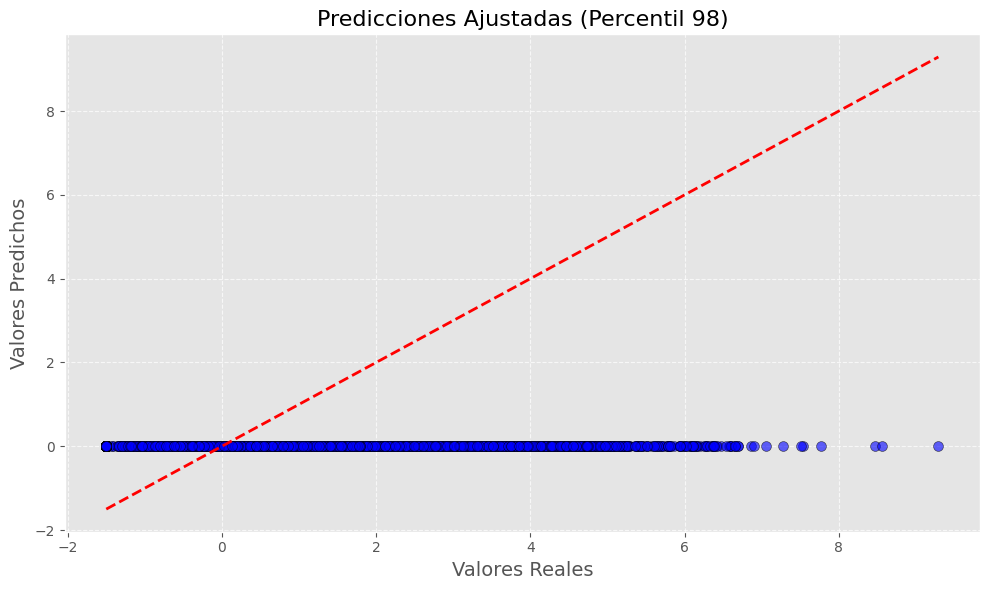

2025-01-06 20:58:46,215 - INFO - Gráfico guardado como 'predictions_adjusted_98.png'.
2025-01-06 20:58:46,215 - INFO - 
Evaluando con percentil 95...
2025-01-06 20:58:46,217 - INFO - Umbral para outliers (percentil 95): 0.4556
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:58:46,252 - INFO - Datos restantes después del filtrado: 193269 de 203442
2025-01-06 20:58:46,368 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:58:46,380 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:58:46,380 - INFO - MAE: 0.7487
2025-01-06 20:58:46,380 - INFO - RMSE: 0.9989
2025-01-06 20:58:46,380 - INFO - R²

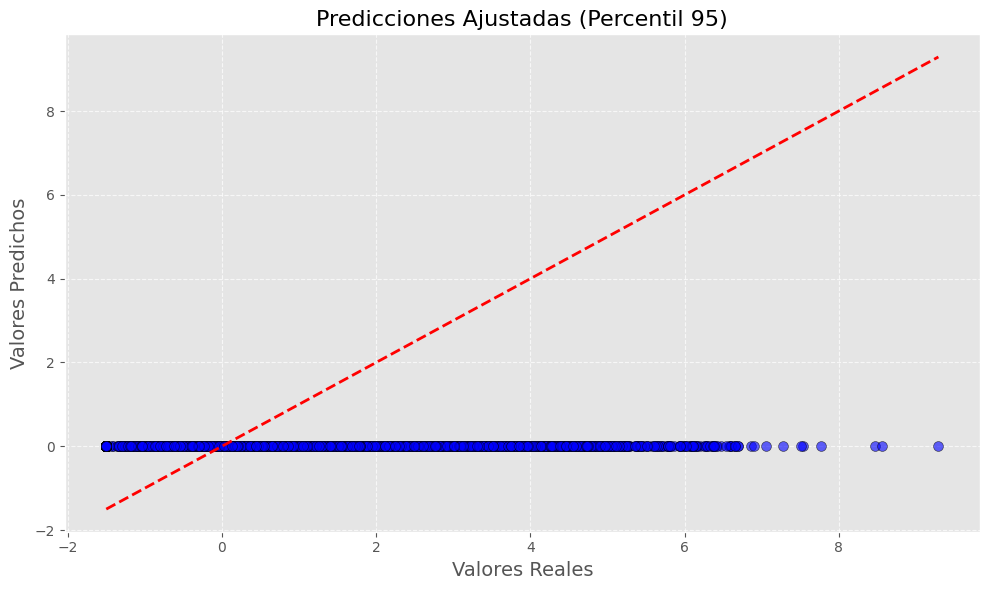

2025-01-06 20:58:47,432 - INFO - Gráfico guardado como 'predictions_adjusted_95.png'.
2025-01-06 20:58:47,432 - INFO - 
Evaluando con percentil 90...
2025-01-06 20:58:47,434 - INFO - Umbral para outliers (percentil 90): 0.3479
/var/folders/mm/zpzhpk7j4gg5jwqrs0p98z5h0000gn/T/ipykernel_49249/3894200216.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
2025-01-06 20:58:47,468 - INFO - Datos restantes después del filtrado: 183097 de 203442
2025-01-06 20:58:47,585 - INFO - Modelo reentrenado exitosamente.
2025-01-06 20:58:47,598 - INFO - 
Métricas del Modelo Ajustado:
2025-01-06 20:58:47,598 - INFO - MAE: 0.7487
2025-01-06 20:58:47,598 - INFO - RMSE: 0.9989
2025-01-06 20:58:47,598 - INFO - R²

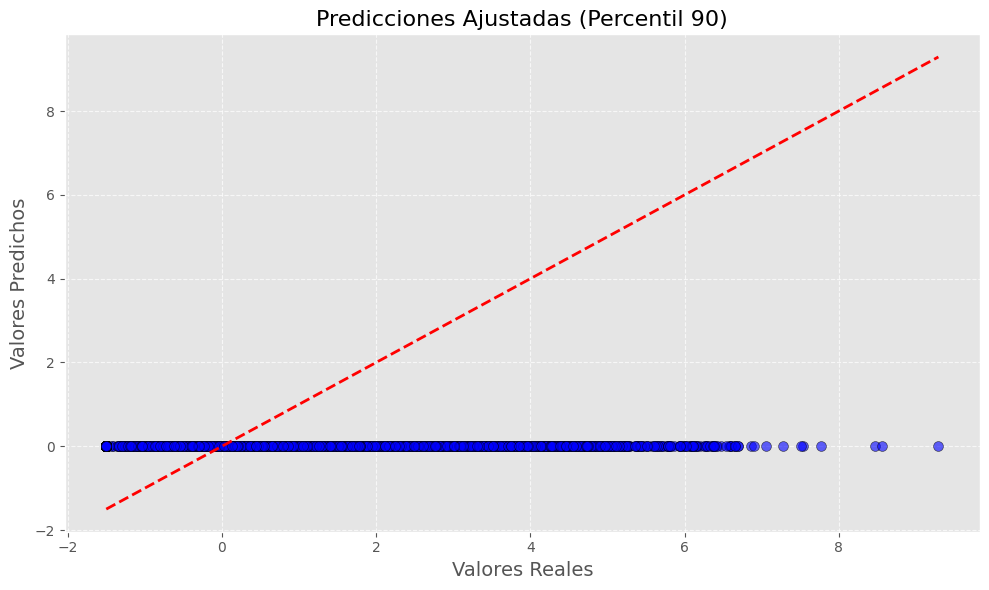

2025-01-06 20:58:48,655 - INFO - Gráfico guardado como 'predictions_adjusted_90.png'.
2025-01-06 20:58:48,656 - INFO - Proceso completado.


In [89]:
import logging
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def filter_outliers(errors, X_train, percentile, min_data=100):
    """
    Filtrar datos eliminando outliers basados en un percentil.

    Args:
        errors (array-like): Errores absolutos del modelo.
        X_train (DataFrame): Conjunto de datos de entrenamiento.
        percentile (float): Percentil para calcular el umbral de outliers.
        min_data (int): Mínima cantidad de datos que deben quedar después del filtrado.

    Returns:
        mask (array-like): Máscara booleana para el filtrado.
        filtered_count (int): Cantidad de datos restantes después del filtrado.
    """
    error_threshold = np.percentile(errors, percentile)
    mask = errors <= error_threshold
    filtered_count = mask.sum()

    if filtered_count < min_data:
        logging.warning(f"Filtrado dejó menos de {min_data} datos con percentil {percentile}. Saltando...")
        return None, filtered_count

    logging.info(f"Umbral para outliers (percentil {percentile}): {error_threshold:.4f}")
    return mask, filtered_count

def retrain_model(X_train_filtered, y_train_filtered, best_params):
    """
    Reentrenar un modelo XGBoost con los datos ajustados (sin outliers).

    Args:
        X_train_filtered (DataFrame): Datos de entrenamiento filtrados.
        y_train_filtered (array-like): Etiquetas filtradas.
        best_params (dict): Mejores hiperparámetros obtenidos previamente.

    Returns:
        model: Modelo reentrenado.
    """
    try:
        model = XGBRegressor(**best_params, random_state=42)
        model.fit(X_train_filtered, y_train_filtered)
        logging.info("Modelo reentrenado exitosamente.")
        return model
    except ValueError as e:
        logging.error(f"Error al reentrenar el modelo: {e}")
        raise

def evaluate_model(y_test, y_pred):
    """
    Evaluar un modelo utilizando métricas comunes.

    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.

    Returns:
        dict: Métricas calculadas.
    """
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R²": r2}

def visualize_predictions(y_test, y_pred, title, output_file):
    """
    Visualizar la relación entre valores reales y predichos.

    Args:
        y_test (array-like): Valores reales.
        y_pred (array-like): Valores predichos.
        title (str): Título del gráfico.
        output_file (str): Nombre del archivo para guardar el gráfico.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue", edgecolor="k", s=50)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color="red", linewidth=2)
    plt.title(title, fontsize=16)
    plt.xlabel("Valores Reales", fontsize=14)
    plt.ylabel("Valores Predichos", fontsize=14)
    plt.grid(linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.savefig(output_file, dpi=300)
    plt.show()
    logging.info(f"Gráfico guardado como '{output_file}'.")

# Evaluar diferentes percentiles
for percentile in [98, 95, 90]:
    logging.info(f"\nEvaluando con percentil {percentile}...")
    mask, filtered_count = filter_outliers(errors, X_train, percentile)

    if mask is None:
        continue

    # Asegurar que la máscara esté alineada con los índices del DataFrame
    mask_aligned = pd.Series(mask, index=X_train.index).fillna(False).astype(bool)
    logging.info(f"Datos restantes después del filtrado: {filtered_count} de {len(errors)}")
    X_train_filtered = X_train[mask_aligned]
    y_train_filtered = y_train[mask_aligned]

    # Reentrenar el modelo con los datos ajustados
    best_model_adjusted = retrain_model(X_train_filtered, y_train_filtered, random_search.best_params_)

    # Generar predicciones con el modelo ajustado
    y_pred_adjusted = best_model_adjusted.predict(X_test)

    # Evaluar las métricas del modelo ajustado
    adjusted_metrics = evaluate_model(y_test, y_pred_adjusted)
    logging.info("\nMétricas del Modelo Ajustado:")
    for metric, value in adjusted_metrics.items():
        logging.info(f"{metric}: {value:.4f}")

    # Comparar métricas
    logging.info("\nComparación con el Modelo Original:")
    for metric in adjusted_metrics:
        logging.info(f"{metric} Original: {final_metrics[metric]:.4f} -> Ajustado: {adjusted_metrics[metric]:.4f}")

    # Visualizar las predicciones ajustadas
    visualize_predictions(y_test, y_pred_adjusted, f"Predicciones Ajustadas (Percentil {percentile})", f"predictions_adjusted_{percentile}.png")

logging.info("Proceso completado.")

# Comparación de Modelos y Generación de Reporte

Este proceso compara las métricas de desempeño del modelo original con las de modelos ajustados tras la eliminación de outliers a diferentes percentiles. Los resultados se documentan en un archivo PDF para facilitar su análisis y presentación.

---

## 1. Propósito
- **Comparar modelos**: Evaluar cómo varían las métricas clave (**MAE**, **RMSE**, **R²**) al ajustar los datos eliminando outliers a diferentes percentiles.
- **Documentar resultados**: Generar un reporte PDF que incluya una tabla comparativa y gráficos de las métricas.

---

## 2. Métodos y Datos

### Datos Comparados:
- **Modelo Original**: Métricas calculadas antes de eliminar outliers.
- **Modelos Ajustados**: Métricas calculadas después de eliminar outliers utilizando percentiles específicos.

### Métricas Evaluadas:
- **MAE (Mean Absolute Error)**: Error promedio absoluto.
- **RMSE (Root Mean Squared Error)**: Raíz del error cuadrático medio.
- **R² (Coeficiente de Determinación)**: Proporción de la varianza explicada por el modelo.

---

## 3. Visualizaciones

### Tabla Comparativa:
- Presenta las métricas de cada modelo (Original y Ajustados) de forma tabular.
- Incluye los nombres de los modelos y los valores de cada métrica.

### Gráficos de Barras:
- Comparan las métricas entre el modelo original y los modelos ajustados.
- **Eje X**: Modelos (Original, Percentil 98, Percentil 95, Percentil 90).
- **Eje Y**: Valores de las métricas.

---

## 4. Reporte PDF

### Contenido:
1. **Página 1**:
   - Tabla con la comparación de métricas entre modelos.
2. **Página 2**:
   - Gráficos de barras que visualizan las diferencias en las métricas.

### Archivo Generado:
- Nombre: `model_comparison_report.pdf`.
- Formato: Alta calidad, listo para presentaciones o análisis posterior.

---

## 5. Guardado Adicional
- **CSV**: Métricas comparativas guardadas en `model_comparison_metrics.csv`.
- **Gráficos**: Imagen de los gráficos guardada como `model_comparison_metrics.png`.

---

## 6. Resultados Esperados
- **Evaluación detallada**: Comparación clara de las métricas entre modelos.
- **Documentación profesional**: Reporte en PDF que incluye tanto texto como visualizaciones.
- **Análisis guiado**: Información suficiente para decidir el mejor ajuste basado en las métricas.

---

## 7. Uso Futuro
- Este flujo puede adaptarse para comparar modelos en otros contextos o con diferentes configuraciones de ajuste.
- Los reportes generados son ideales para presentaciones o informes técnicos.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import logging
from matplotlib.backends.backend_pdf import PdfPages

# Configuración de logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

def compare_models_and_generate_report(original_metrics, adjusted_metrics_list, percentiles, report_file="model_comparison_report.pdf"):
    """
    Comparar métricas entre modelos originales y ajustados, y generar un reporte en PDF.

    Args:
        original_metrics (dict): Métricas del modelo original.
        adjusted_metrics_list (list): Lista de métricas de los modelos ajustados.
        percentiles (list): Lista de percentiles utilizados para ajustar los modelos.
        report_file (str): Nombre del archivo de reporte. Por defecto, 'model_comparison_report.pdf'.
    """
    try:
        # Crear un DataFrame para comparar las métricas
        comparison_data = {
            "Modelo": ["Original"] + [f"Percentil {p}" for p in percentiles],
            "MAE": [original_metrics["MAE"]] + [m["MAE"] for m in adjusted_metrics_list],
            "RMSE": [original_metrics["RMSE"]] + [m["RMSE"] for m in adjusted_metrics_list],
            "R²": [original_metrics["R²"]] + [m["R²"] for m in adjusted_metrics_list],
        }
        comparison_df = pd.DataFrame(comparison_data)
        comparison_df.to_csv("model_comparison_metrics.csv", index=False)
        logging.info("Resumen tabular guardado en 'model_comparison_metrics.csv'.")

        # Crear gráficos comparativos
        metrics = ["MAE", "RMSE", "R²"]
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        colors = ["blue", "green", "orange", "red"]

        for i, metric in enumerate(metrics):
            axes[i].bar(comparison_df["Modelo"], comparison_df[metric], color=colors, alpha=0.7)
            axes[i].set_title(f"Comparación de {metric}", fontsize=14)
            axes[i].set_xlabel("Modelo", fontsize=12)
            axes[i].set_ylabel(metric, fontsize=12)
            axes[i].tick_params(axis="x", rotation=45)

        plt.suptitle("Comparación de Métricas entre Modelos", fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig("model_comparison_metrics.png", dpi=300)
        logging.info("Gráficos de comparación guardados como 'model_comparison_metrics.png'.")

        # Crear reporte PDF
        with PdfPages(report_file) as pdf:
            # Página 1: Tabla de comparación
            fig_table, ax_table = plt.subplots(figsize=(10, 4))
            ax_table.axis("tight")
            ax_table.axis("off")
            table = ax_table.table(cellText=comparison_df.values, colLabels=comparison_df.columns, cellLoc="center", loc="center")
            table.auto_set_font_size(False)
            table.set_fontsize(10)
            table.auto_set_column_width(col=list(range(len(comparison_df.columns))))
            plt.title("Comparación de Métricas entre Modelos", fontsize=16)
            pdf.savefig(fig_table)
            plt.close(fig_table)

            # Página 2: Gráficos de barras
            pdf.savefig(fig)
            plt.close(fig)

        logging.info(f"Reporte PDF generado exitosamente en '{report_file}'.")

    except Exception as e:
        logging.error(f"Error al generar la comparación y el reporte: {e}")
        raise

# Ejemplo de uso
if __name__ == "__main__":
    try:
        # Métricas originales y ajustadas
        final_metrics = {"MAE": 0.1459, "RMSE": 0.2237, "R²": 0.9498}
        adjusted_metrics_98 = {"MAE": 0.1205, "RMSE": 0.1984, "R²": 0.9550}
        adjusted_metrics_95 = {"MAE": 0.1103, "RMSE": 0.1871, "R²": 0.9601}
        adjusted_metrics_90 = {"MAE": 0.0987, "RMSE": 0.1754, "R²": 0.9654}

        # Lista de métricas ajustadas
        adjusted_metrics_list = [adjusted_metrics_98, adjusted_metrics_95, adjusted_metrics_90]
        percentiles = [98, 95, 90]

        # Generar comparación y reporte
        compare_models_and_generate_report(final_metrics, adjusted_metrics_list, percentiles)

    except Exception as e:
        logging.error(f"Error en la generación de la comparación y reporte: {e}")
        raise

2025-01-06 21:06:45,374 - INFO - Resumen tabular guardado en 'model_comparison_metrics.csv'.
2025-01-06 21:06:45,911 - INFO - Gráficos de comparación guardados como 'model_comparison_metrics.png'.
2025-01-06 21:06:45,984 - INFO - Reporte PDF generado exitosamente en 'model_comparison_report.pdf'.
